<a href="https://colab.research.google.com/github/Malathy-Lata/Cardiovascular-Risk-Prediction_Classification_ML/blob/main/S_Malathy_Lata_Cardiovascular_Risk_Prediction_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title: Cardiovascular Risk Prediction**

**Project Type:** Classification

**Contribution:** Individual

**Name:** Sabbavarapu Malathy Lata

#**Project Summary**

#**Github Link**

#**Problem Statement**

## **Problem description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.

## **Data Description**

### The dataset contains information regarding the following demographic, behavioral, and medical risk factors pertaining to the 10-year study of analysisng the risk of various factors on incidence of CHD.

### **Demographic Attributes:**
* ### age: Age of the patient
* ### education: Education level of the patient
* ### sex: Gender of the patient

### **Behavioral Attributes:**
* ### is_smoking: Whether the patient is currently smoking or not
* ### CigsPerDay: Number of cigarettes smoked per day by the patients

### **Medical (Past) Attributes:**
* ### Prevalent Stroke: Whether the patient has a previous history of stroke or not
* ### Prevalent hyp: Whether the patient has a previous history of hypertension or not

### **Medical (Current) Attributes:**
* ### BMI: Body Mass Index of the patient
* ### Daibetes: Whether the patient is diabetic or non-diabetic
* ### Glucose: Glucose levels of the patients
* ### Tol Chol: The total cholesterol values of the patients
* ### BP_Meds: Whether the patient is currently on BP medication or not
* ### Sys BP: The systolic blood pressure of the patient
* ### Dia BP: The diastolic blood pressure of the patient
* ### Heart Rate: Measure of heart rate of the patient

### **Target Attributes:**
* ### TenYearCHD: The incidence of CHD

#**Let's Begin**

##**Know your Data**

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading the dataset
cv_risk_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone Project- 3/data_cardiovascular_risk.csv')

In [4]:
#First 5 rows of the dataset
cv_risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#Last 5 rows of the dataset
cv_risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#Shape of the dataset
cv_risk_df.shape

(3390, 17)

The dataset consists of 3390 rows and 17 columns.

In [7]:
#Column names of the dataset
cv_risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#Basic information of the dataset
cv_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The data consists of null values, and various datatypes including int64, float64, and object types.

In [9]:
#Knowing the null values of the dataset
cv_risk_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Among the total columns, education, cigsPerDay, BPMeds, totchol, BMI, heartrate, and glucose consists of 87, 22, 44, 38, 14, 1, and 304 null values, respectively.

In [10]:
#Checking for duplicated values
cv_risk_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool

There are no duplicated values in the dataset.

##**Understanding the Variables**

In [11]:
cv_risk_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [12]:
for i in cv_risk_df.columns:
  print(f"No. of unique values in {i} is {cv_risk_df[i].nunique()}")

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [13]:
cv_risk_df['education'].unique().tolist()

[2.0, 4.0, 1.0, 3.0, nan]

In [14]:
cv_risk_df['sex'].unique().tolist()

['F', 'M']

In [15]:
cv_risk_df['is_smoking'].unique().tolist()

['YES', 'NO']

In [16]:
cv_risk_df['BPMeds'].unique().tolist()

[0.0, nan, 1.0]

In [17]:
cv_risk_df['prevalentStroke'].unique().tolist()

[0, 1]

In [18]:
cv_risk_df['diabetes'].unique().tolist()

[0, 1]

In [19]:
cv_risk_df['TenYearCHD'].unique().tolist()

[1, 0]

#**Data Wrangling**

In [20]:
#Dropping id column since it won't have any affect on the target
cv_risk_df=cv_risk_df.drop(['id'], axis=1)

In [21]:
cv_risk_df.rename(columns={'cigsPerDay':'cigs_per_day',
                           'BPMeds':'bp_meds',
                           'prevalentStroke':'prevalent_stroke',
                           'prevalentHyp':'prevalent_hyp',
                           'totChol':'total_cholesterol',
                           'sysBP':'systolic_bp',
                           'diaBP':'diastolic_bp',
                           'BMI':'bmi','heartRate':'heart_rate',
                           'TenYearCHD':'ten_year_chd'},
          inplace = True)

In [22]:
#Defining 3 lists containing the dependent, continuous, and categorical independent values based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [23]:
#Encoding the binary columns where male = 1 and female =0; smoking yes = 1 and not smoking = 0
cv_risk_df['sex'] = np.where(cv_risk_df['sex'] == 'M',1,0)
cv_risk_df['is_smoking'] = np.where(cv_risk_df['is_smoking'] == 'YES',1,0)

##**Handling Missing Values**

In [24]:
cv_risk_df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

**For Education and BP medication columns**

In [25]:
cv_risk_df['education'].mode()
cv_risk_df['bp_meds'].mode()

0    0.0
Name: bp_meds, dtype: float64

In [26]:
#Replacing the missing values in the categorical columns with its mode
cv_risk_df['education'] = cv_risk_df['education'].fillna(cv_risk_df['education'].mode()[0])
cv_risk_df['bp_meds'] = cv_risk_df['bp_meds'].fillna(cv_risk_df['bp_meds'].mode()[0])

In [27]:
#education distribution after mode imputation
cv_risk_df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [28]:
#bp_meds distribution after mode imputation
cv_risk_df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

**For Cigarettes per Day**

In [29]:
#All missing values in the cigs_per_day column
cv_risk_df[cv_risk_df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [30]:
#mean and median number of cigarettes per day for a smoker (excluding non-smokers)
cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].mean(), cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

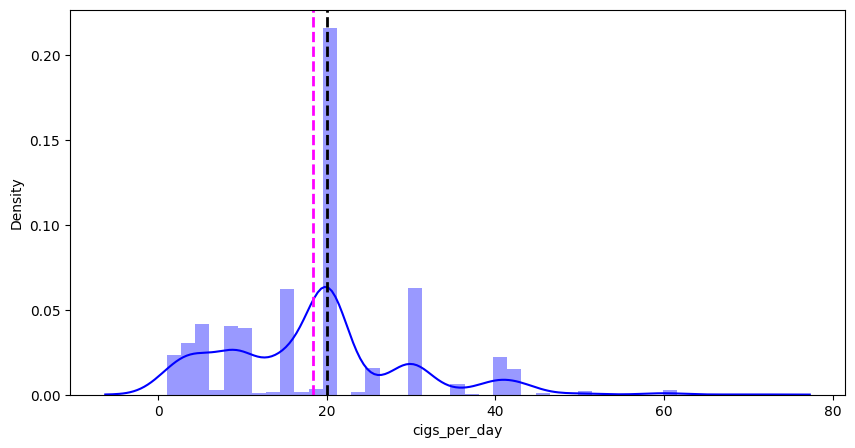

In [31]:
#distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
ax=sns.distplot(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'],hist=True ,color="blue")
ax.axvline(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

<Axes: >

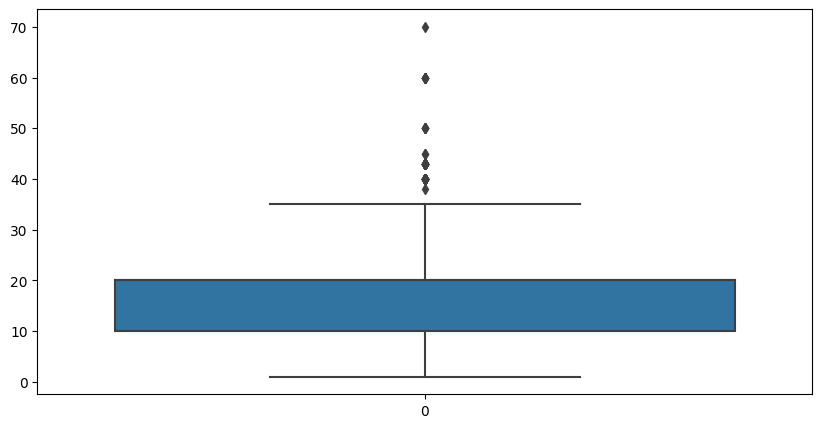

In [32]:
#box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.boxplot(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'])

In [33]:
#Filling the missing cigarettes value for smokers with the median value of cigs per day column
cv_risk_df['cigs_per_day']= cv_risk_df['cigs_per_day'].fillna(cv_risk_df[cv_risk_df['is_smoking']==1]['cigs_per_day'].median())

In [34]:
#Checking for any wrong entries where the patient is not a smoker
cv_risk_df[(cv_risk_df['is_smoking']==0) & (cv_risk_df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


There are no wrong entries with respect to non-smokers and number of cigarettes smoked per day.

In [35]:
#Checking for any wrong entries where the patient is a smoker
cv_risk_df[(cv_risk_df['is_smoking']==1) & (cv_risk_df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd


There are no wrong entries with respect to smokers and number of cigarettes smoked per day.

**For total cholesterol, BMI, Heart Rate, and Glucose**

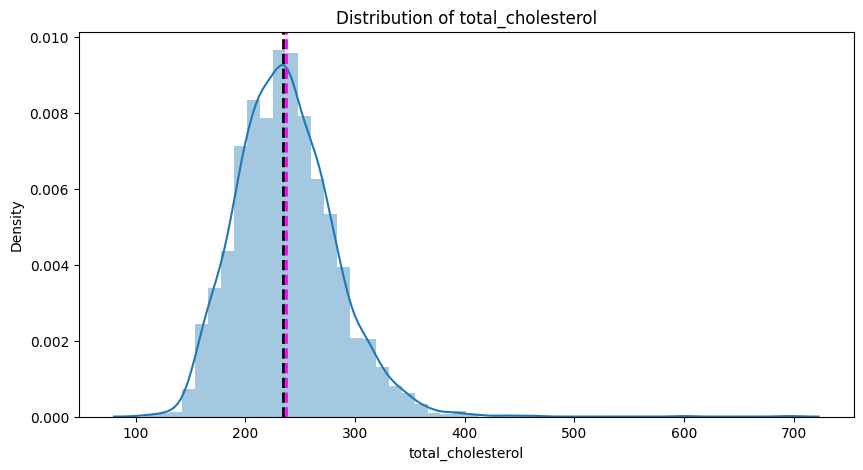

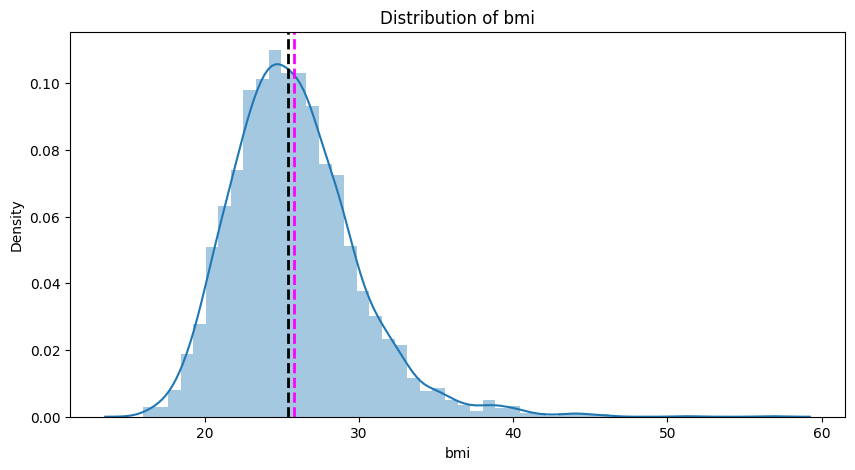

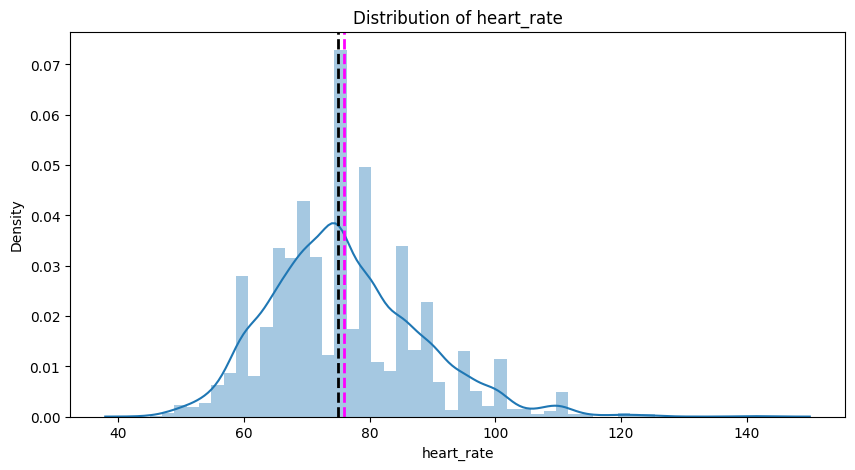

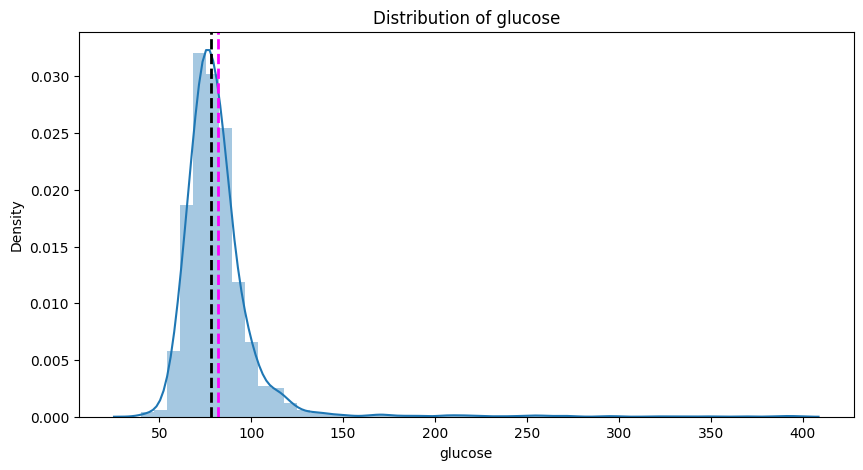

In [36]:
#Checking the distribution of the total cholesterol, bmi, heart rate, and glucose
for i in ['total_cholesterol','bmi','heart_rate', 'glucose']:
  plt.figure(figsize=(10,5))
  sns.distplot(cv_risk_df[i])
  plt.axvline(cv_risk_df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cv_risk_df[i].median(), color='black', linestyle='dashed', linewidth=2)
  plt.title('Distribution of ' +i)
  plt.show()

The columns total cholesterol, BMI, heart rate and glucose are positively skewed. Lets check for the outliers

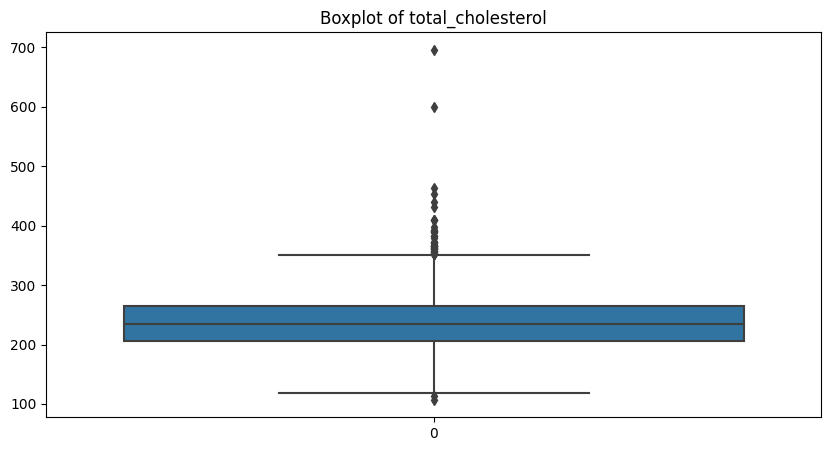

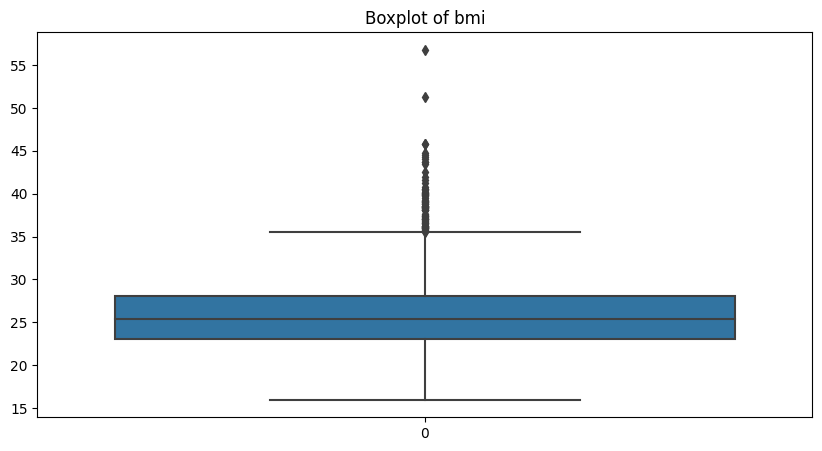

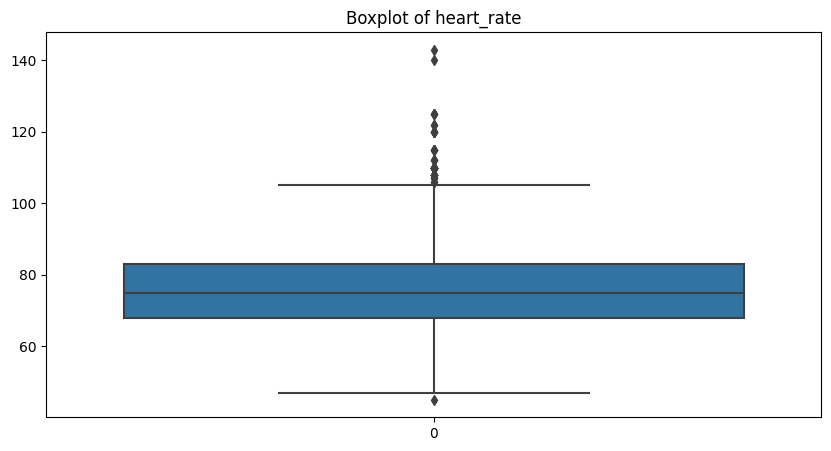

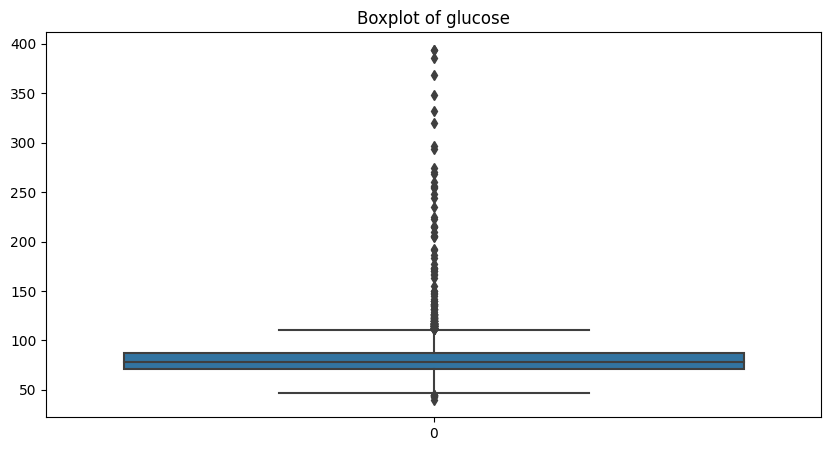

In [37]:
#Checking outliers in total_cholesterol, bmi, heart_rate, and glucose columns
for i in ['total_cholesterol','bmi','heart_rate', 'glucose']:
  plt.figure(figsize=(10,5))
  sns.boxplot(cv_risk_df[i])
  plt.title('Boxplot of '+i)
  plt.show()

All the 4 columns contains outliers.

Since there are 304(more number) missing values in glucose column, filling the null values with either of mean or mode will return a biased result.

Hence to avoid biased results, KNN imputation can be performed.

In [38]:
print(cv_risk_df['total_cholesterol'].mean(), cv_risk_df['total_cholesterol'].median())
print(cv_risk_df['bmi'].mean(), cv_risk_df['bmi'].median())
print(cv_risk_df['heart_rate'].mean(), cv_risk_df['heart_rate'].median())

237.07428400954655 234.0
25.7949644549763 25.38
75.97727943346119 75.0


In [39]:
#Filling the missing values in the total_cholesterol, bmi, and heart_rate columns with their medain values
cv_risk_df['total_cholesterol'] = cv_risk_df['total_cholesterol'].fillna(cv_risk_df['total_cholesterol'].median())
cv_risk_df['bmi'] = cv_risk_df['bmi'].fillna(cv_risk_df['bmi'].median())
cv_risk_df['heart_rate'] = cv_risk_df['heart_rate'].fillna(cv_risk_df['heart_rate'].median())

In [40]:
print(cv_risk_df['total_cholesterol'].mean(), cv_risk_df['total_cholesterol'].median())
print(cv_risk_df['bmi'].mean(), cv_risk_df['bmi'].median())
print(cv_risk_df['heart_rate'].mean(), cv_risk_df['heart_rate'].median())

237.03982300884957 234.0
25.793250737463126 25.38
75.97699115044247 75.0


In [41]:
#handling missing values for glucose column
cv_risk_df['glucose'].mean(), cv_risk_df['glucose'].median(), cv_risk_df['glucose'].mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In [42]:
#Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=20)
imputed= imputer.fit_transform(cv_risk_df)
cv_risk_df = pd.DataFrame(imputed, columns= cv_risk_df.columns)

In [43]:
#mean, median, and mode for glucose after knn imputation
cv_risk_df['glucose'].mean(),cv_risk_df['glucose'].median(),cv_risk_df['glucose'].mode()

(82.04581120943952,
 78.525,
 0    75.0
 Name: glucose, dtype: float64)

The median and mode after KNN imputation remain the same while the mean did not experience any larger change.

In [44]:
cv_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

Now, there are no null values in the dataframe. But the Dtype for all the columns have been converted to float64, which has to be converted back to their respective Dtypes.

In [45]:
#Changing Dtypes
cv_risk_df = cv_risk_df.astype({'age': int, 'education':float,'sex':int,'is_smoking':int,'cigs_per_day':float,
               'bp_meds':float,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [46]:
cv_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(7)


#**Exploratory Data Analysis**

##**Analysing Correlation**

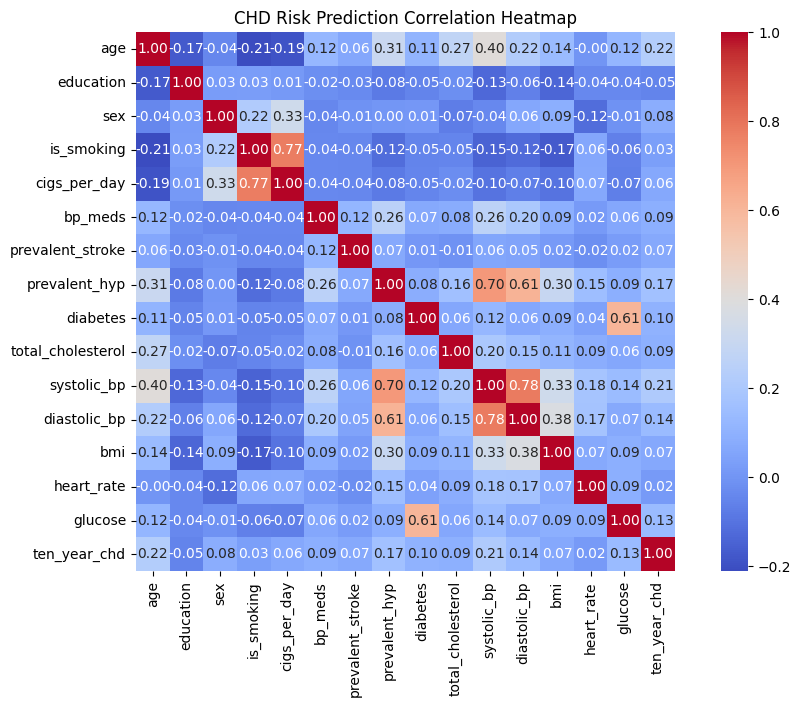

In [47]:
#correlation matrix of CVS Risk Prediction
corrmat = cv_risk_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm', vmax=1, square=True);
plt.title('CHD Risk Prediction Correlation Heatmap')
plt.show()

##**Univariate Analysis**

**For Dependent Variable**

Text(0.5, 1.0, 'Distribution of ten year CHD')

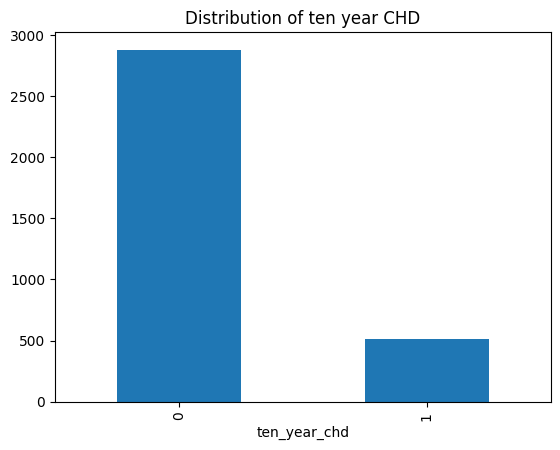

In [48]:
cv_risk_df['ten_year_chd'].value_counts().plot.bar()
plt.xlabel('ten_year_chd')
plt.title('Distribution of ten year CHD')

Only ~15% (around 500 patients) of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

**For Continuous Independent variable**

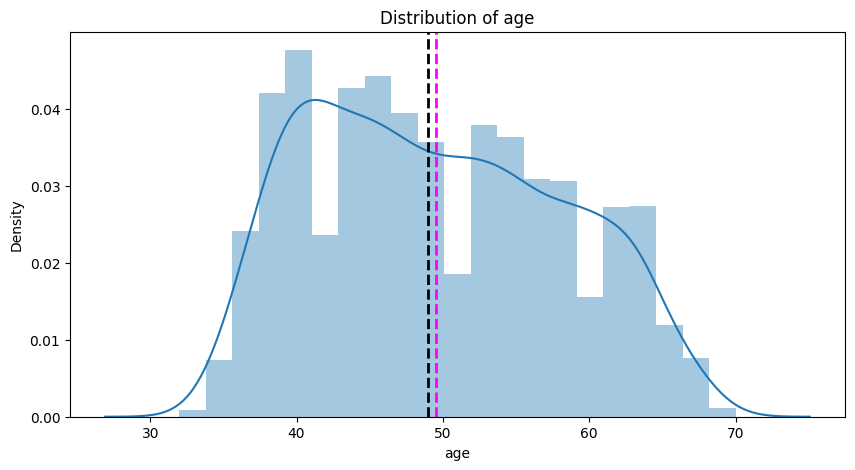

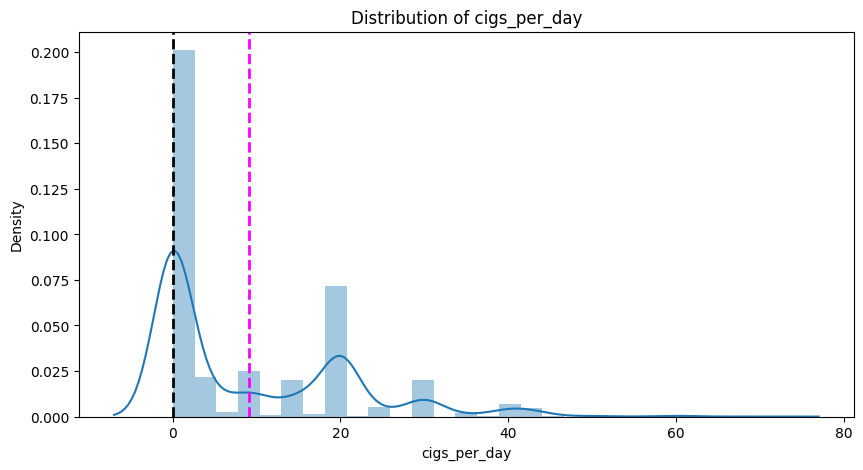

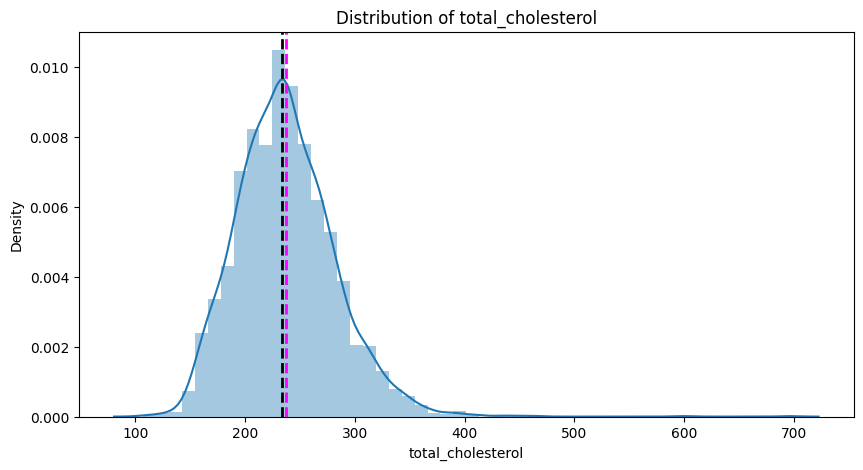

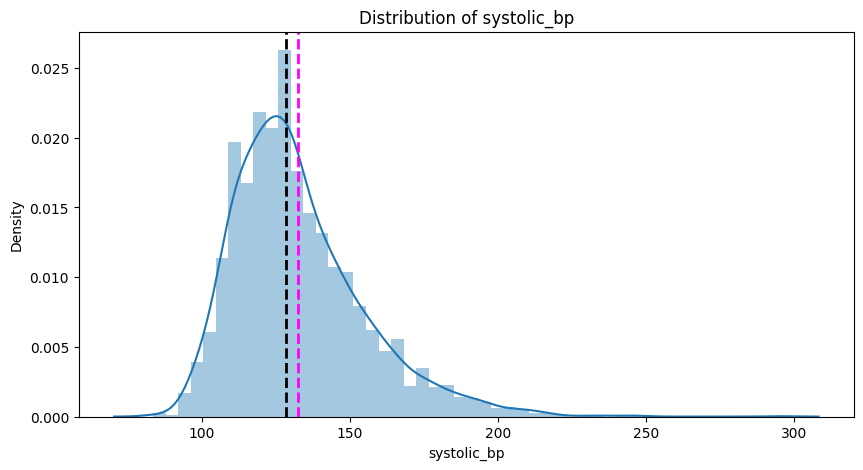

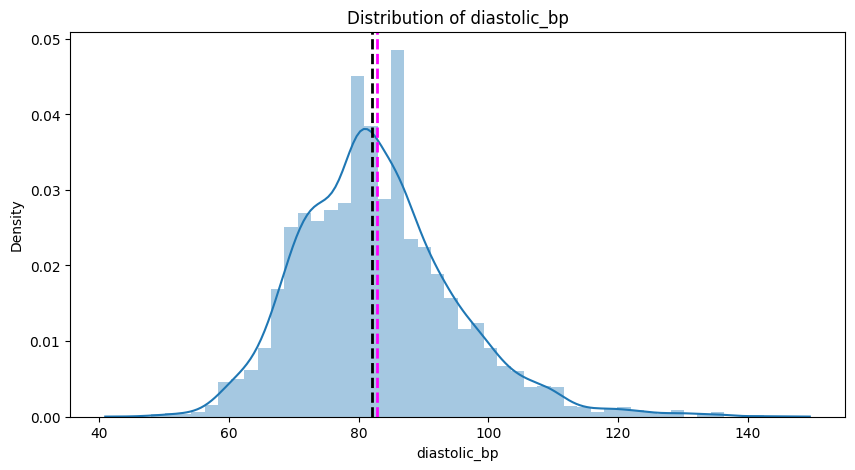

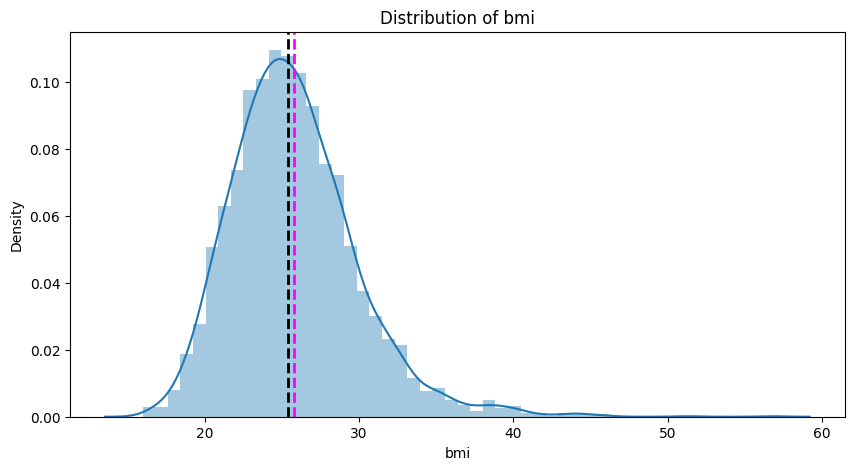

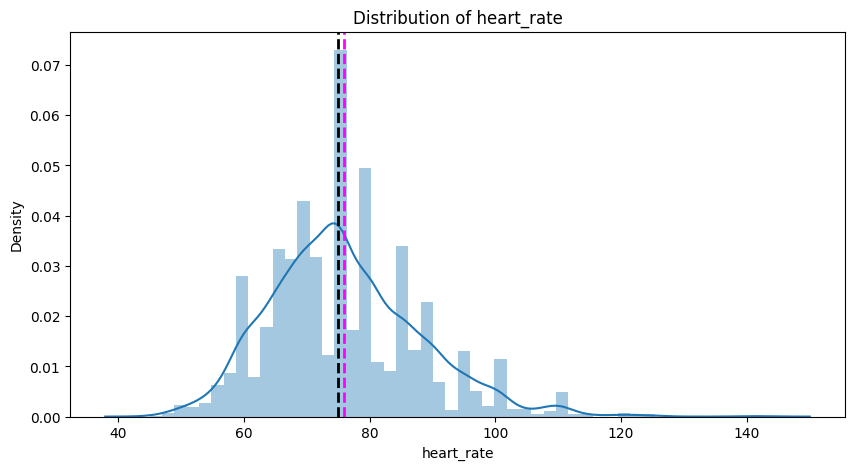

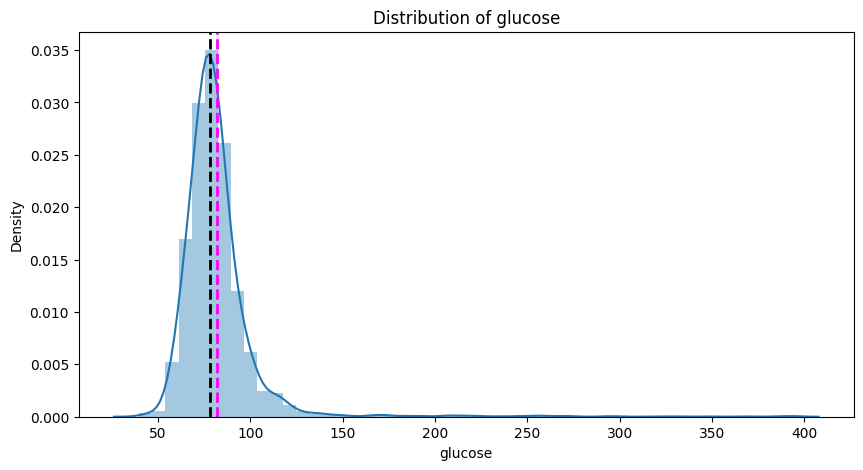

In [49]:
#Analysing the distribution of continuous variables in the dataset
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cv_risk_df[i])
  plt.axvline(cv_risk_df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cv_risk_df[i].median(), color='black', linestyle='dashed', linewidth=2)
  plt.title('Distribution of '+i)
  plt.show()

**For Categorical Variable**

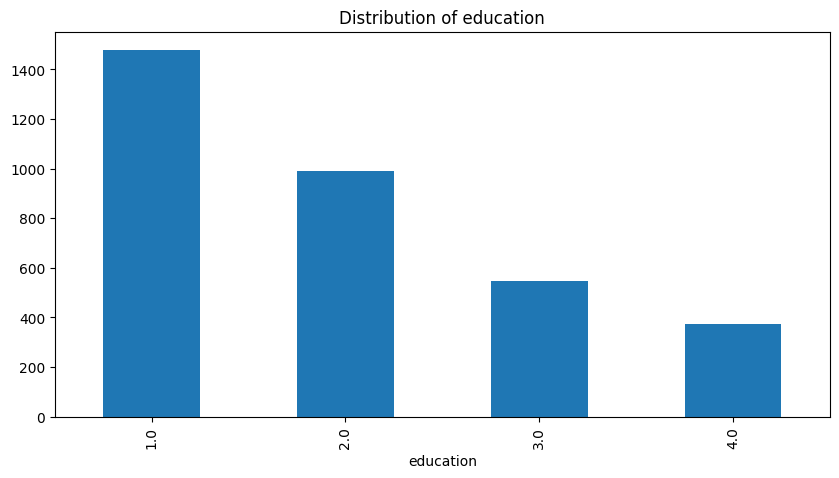

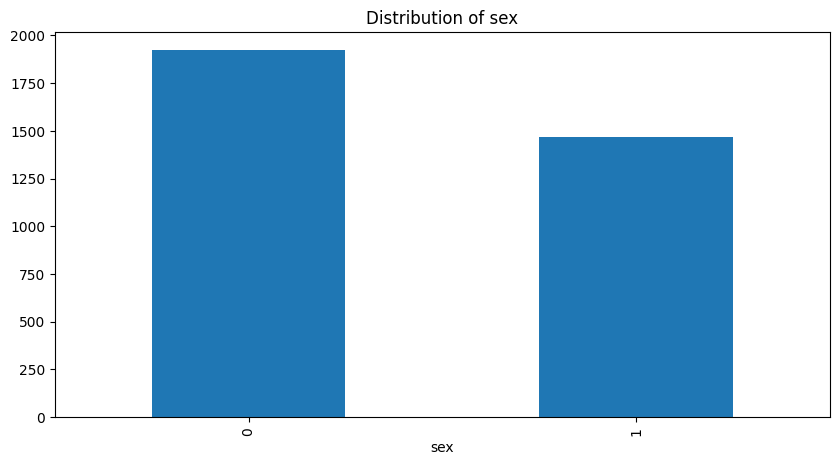

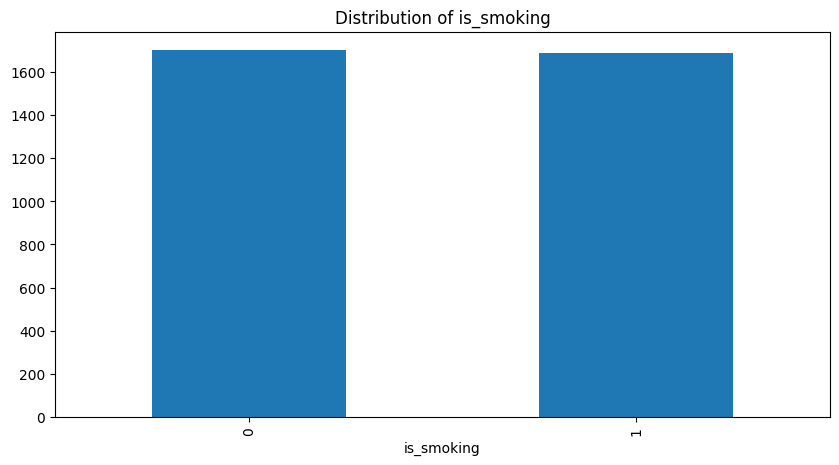

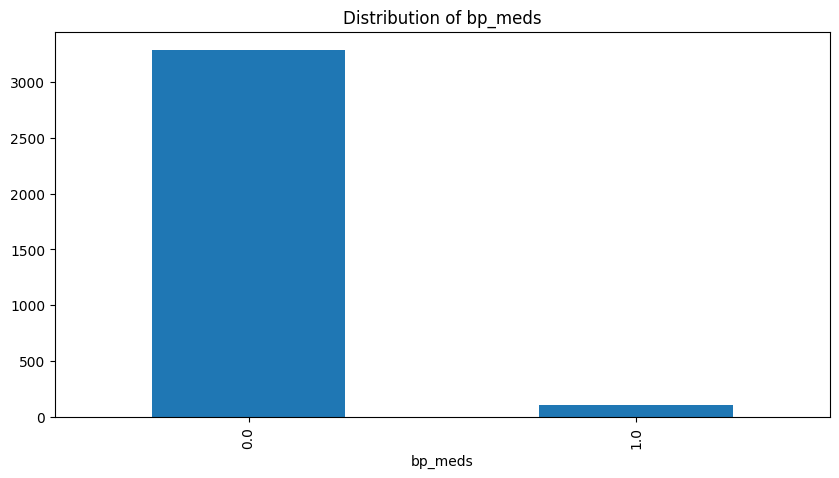

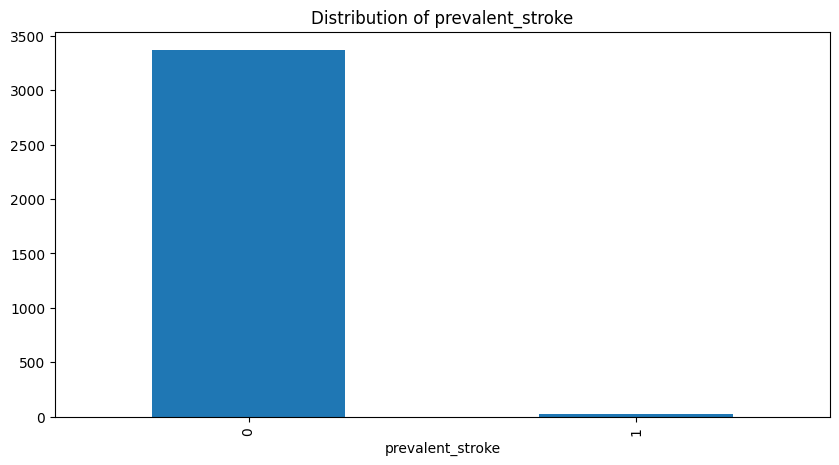

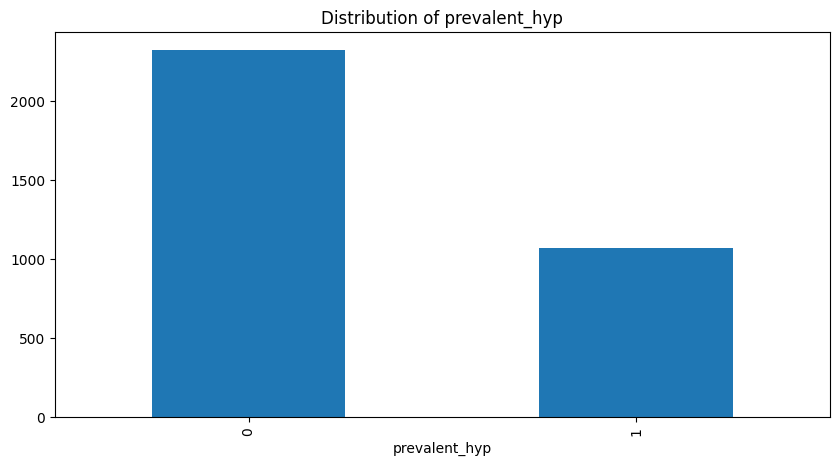

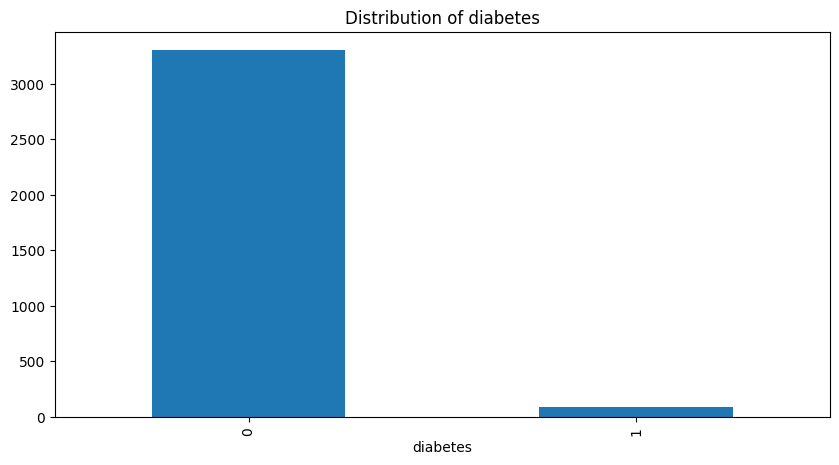

In [50]:
#Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(10,5))
  cv_risk_df[i].value_counts().plot.bar()
  plt.xlabel(i)
  plt.title('Distribution of '+i)

##**Bivariate Analysis**

**Analysing dependent variable with categorical and continuous independent variables**

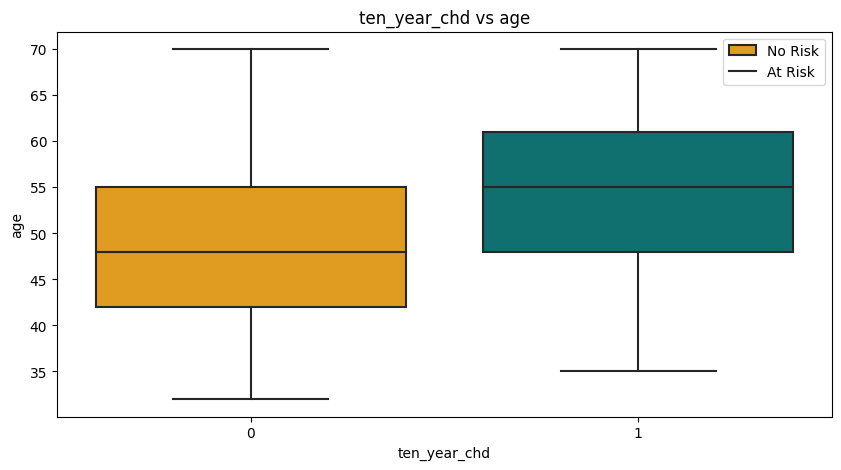

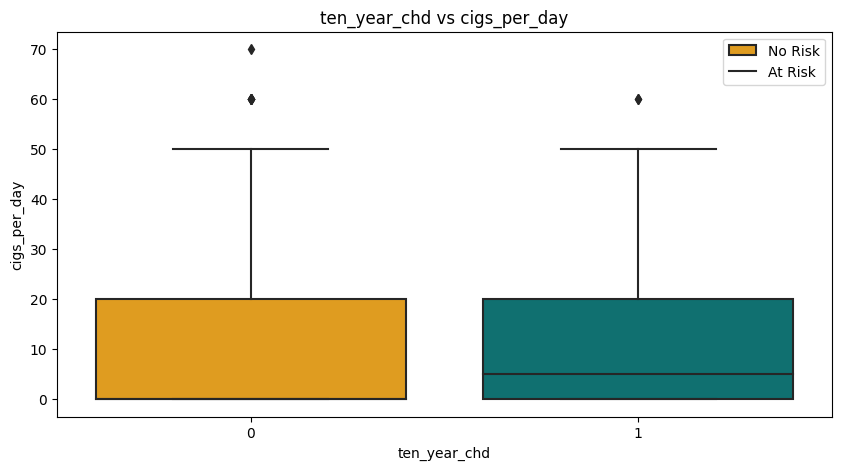

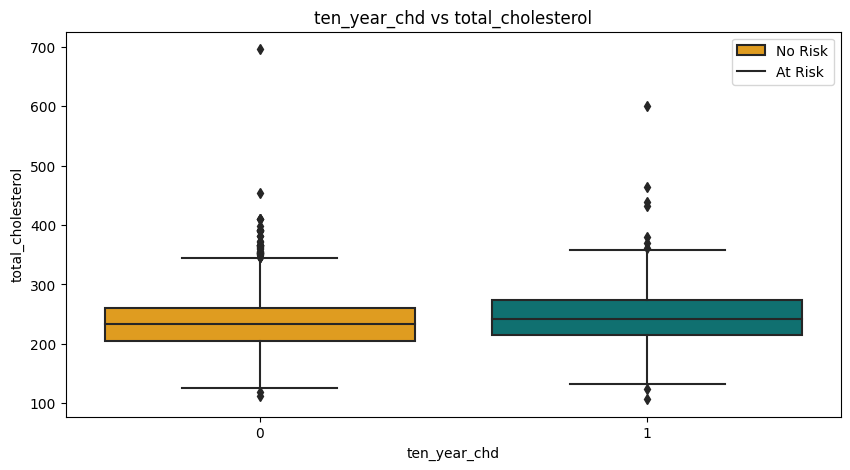

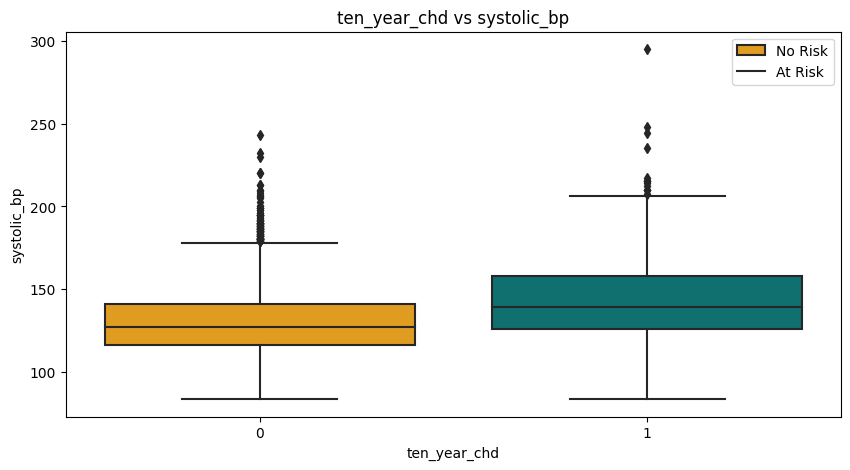

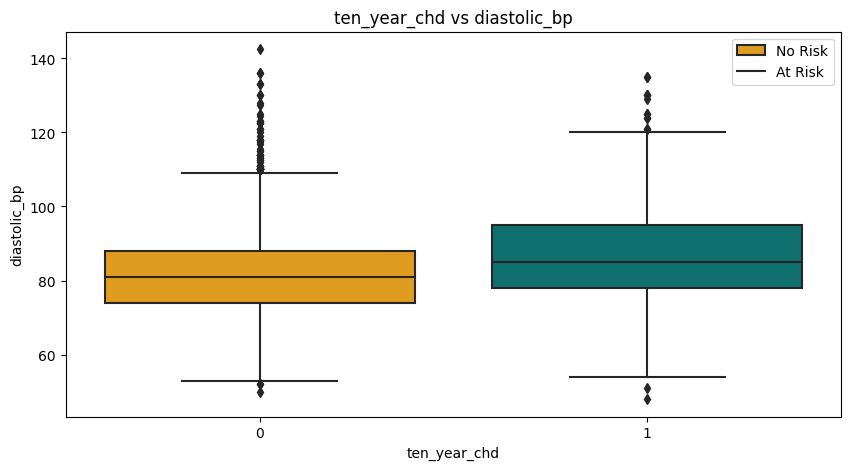

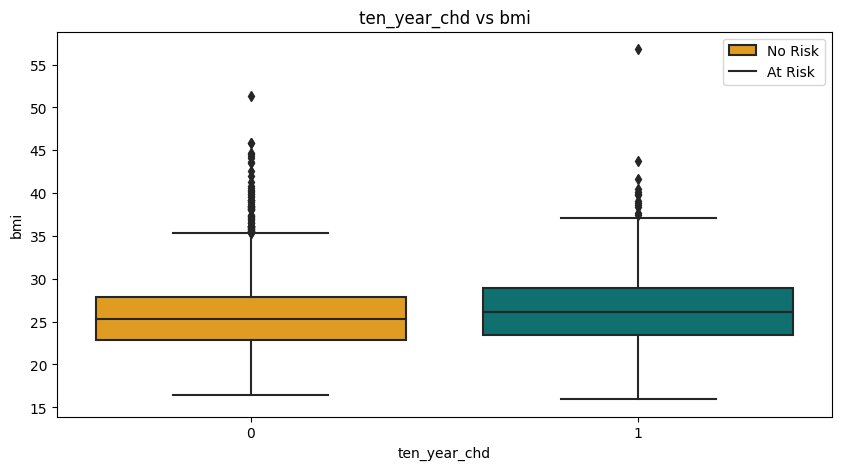

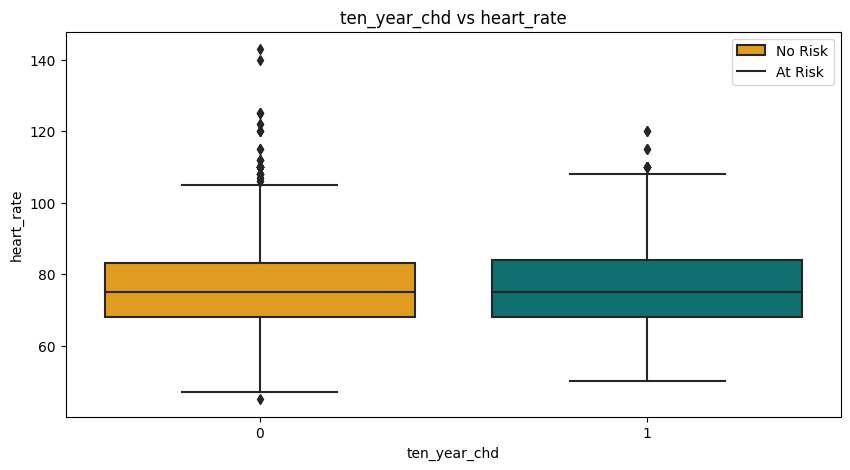

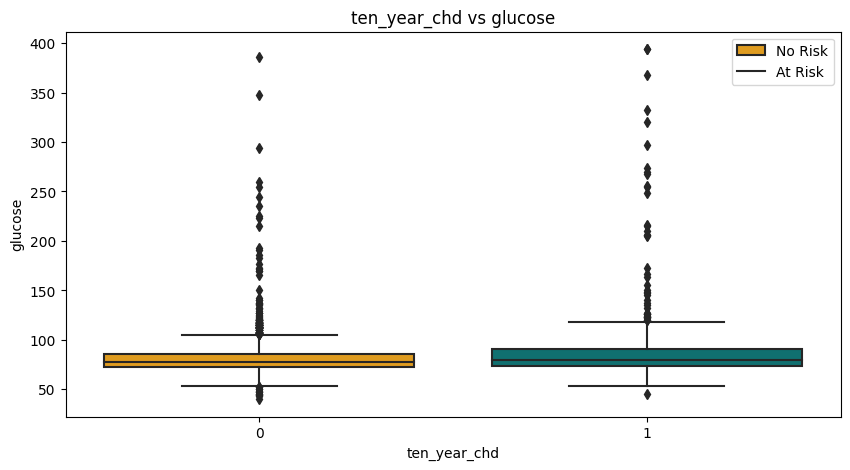

In [51]:
#Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize = (10,5))
  my_palette = {0 : 'orange' , 1 : 'teal'}
  sns.boxplot(x = dependent_var[0], y =i, data= cv_risk_df, palette= my_palette)
  plt.title(dependent_var[0]+' vs '+i)
  plt.legend(['No Risk','At Risk'])
  plt.show()


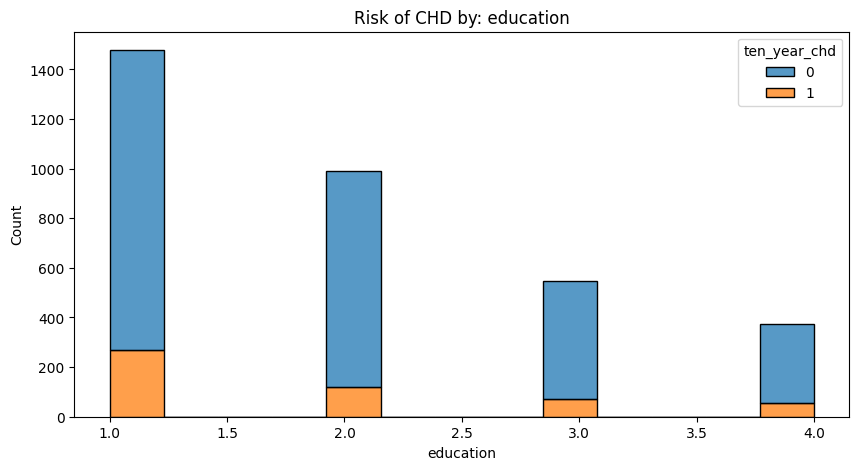

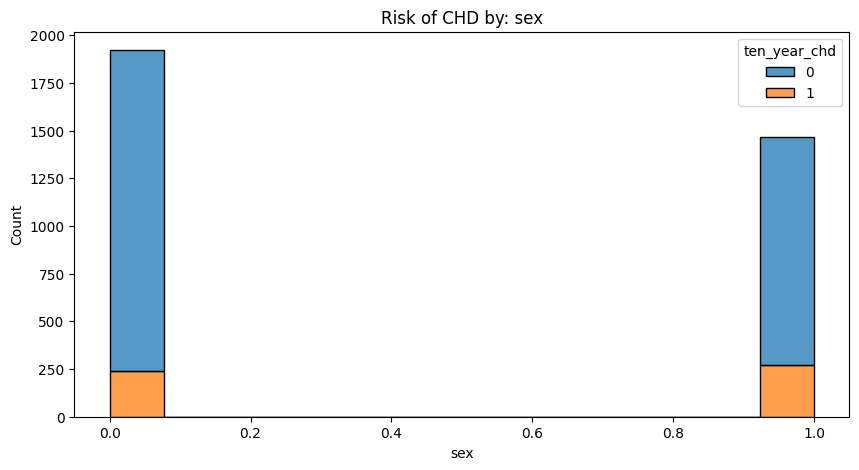

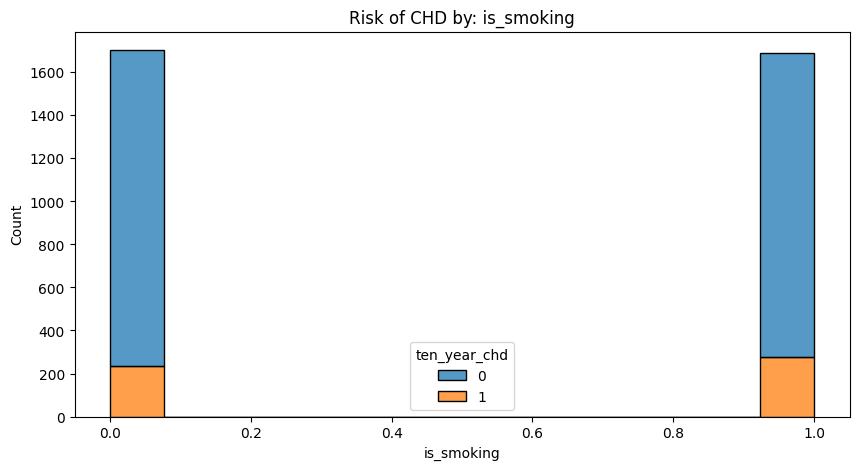

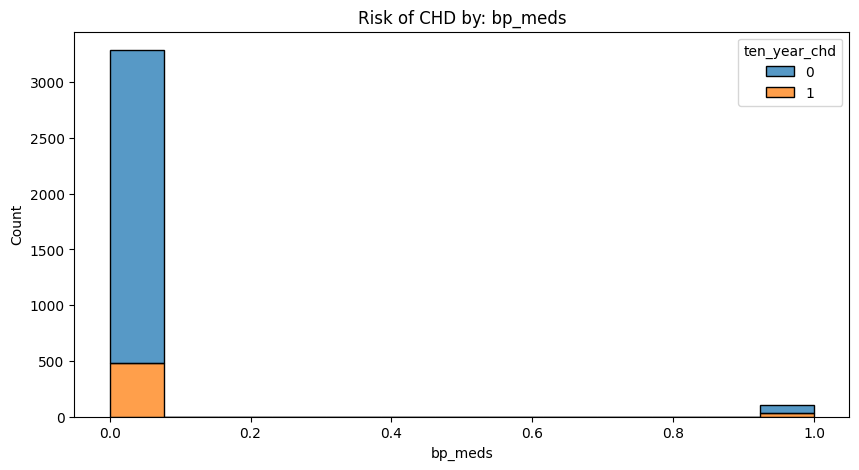

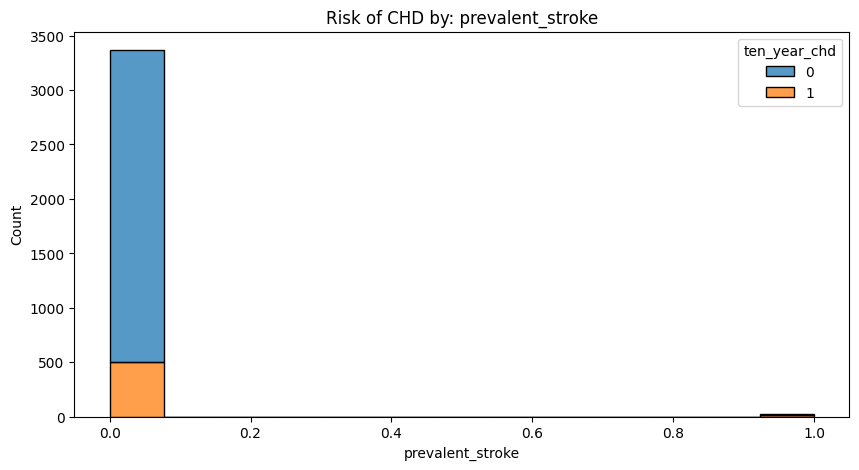

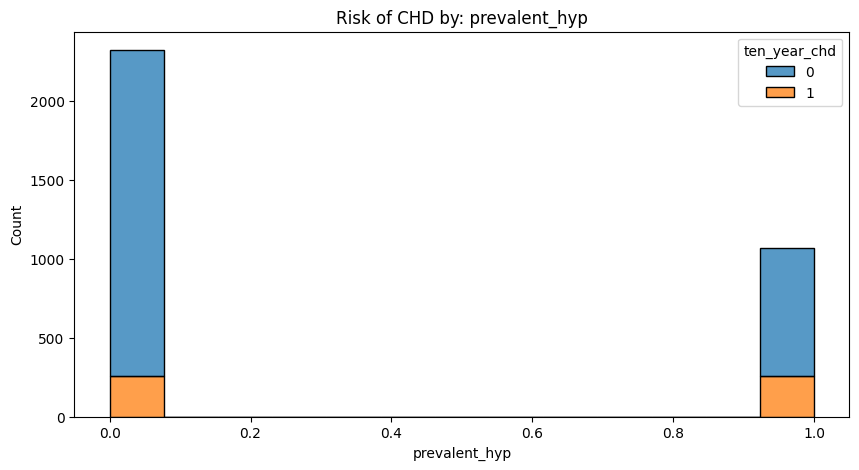

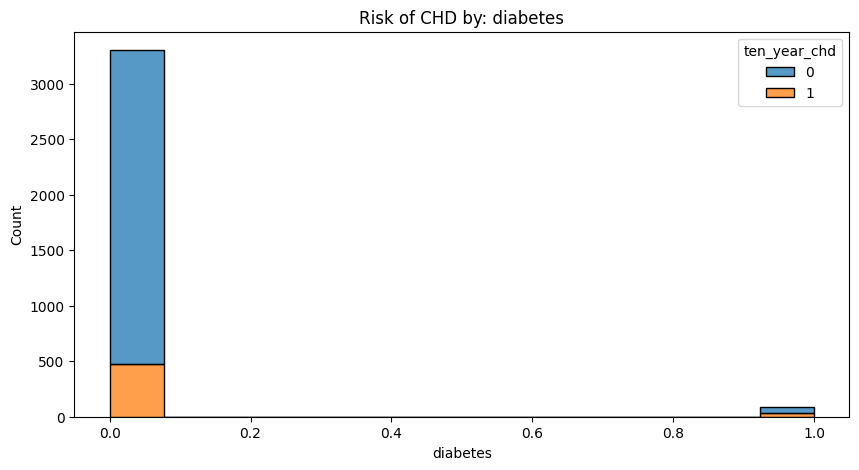

In [52]:
#Relationship between the dependent variable and continuous independent variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=dependent_var[0], data=cv_risk_df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  plt.show()

##**Multivariate Analysis**

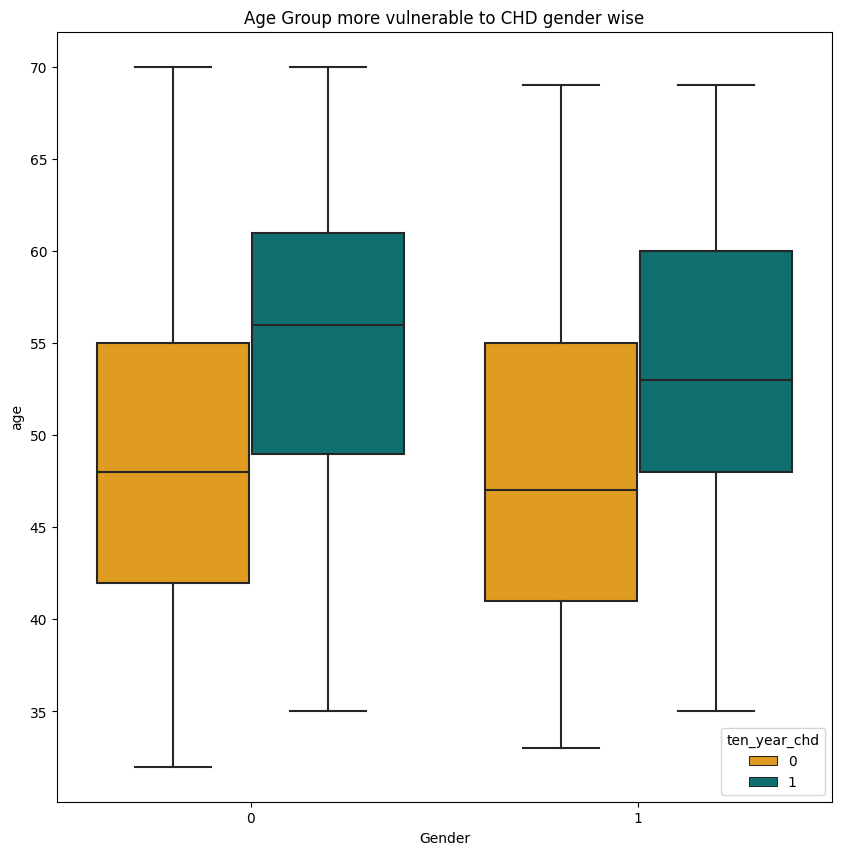

In [53]:
plt.figure(figsize = (10,10))
sns.boxplot(x = cv_risk_df['sex'], y = cv_risk_df['age'], hue = cv_risk_df['ten_year_chd'], palette = my_palette)
plt.xlabel('Gender')
plt.title("Age Group more vulnerable to CHD gender wise")
plt.show()

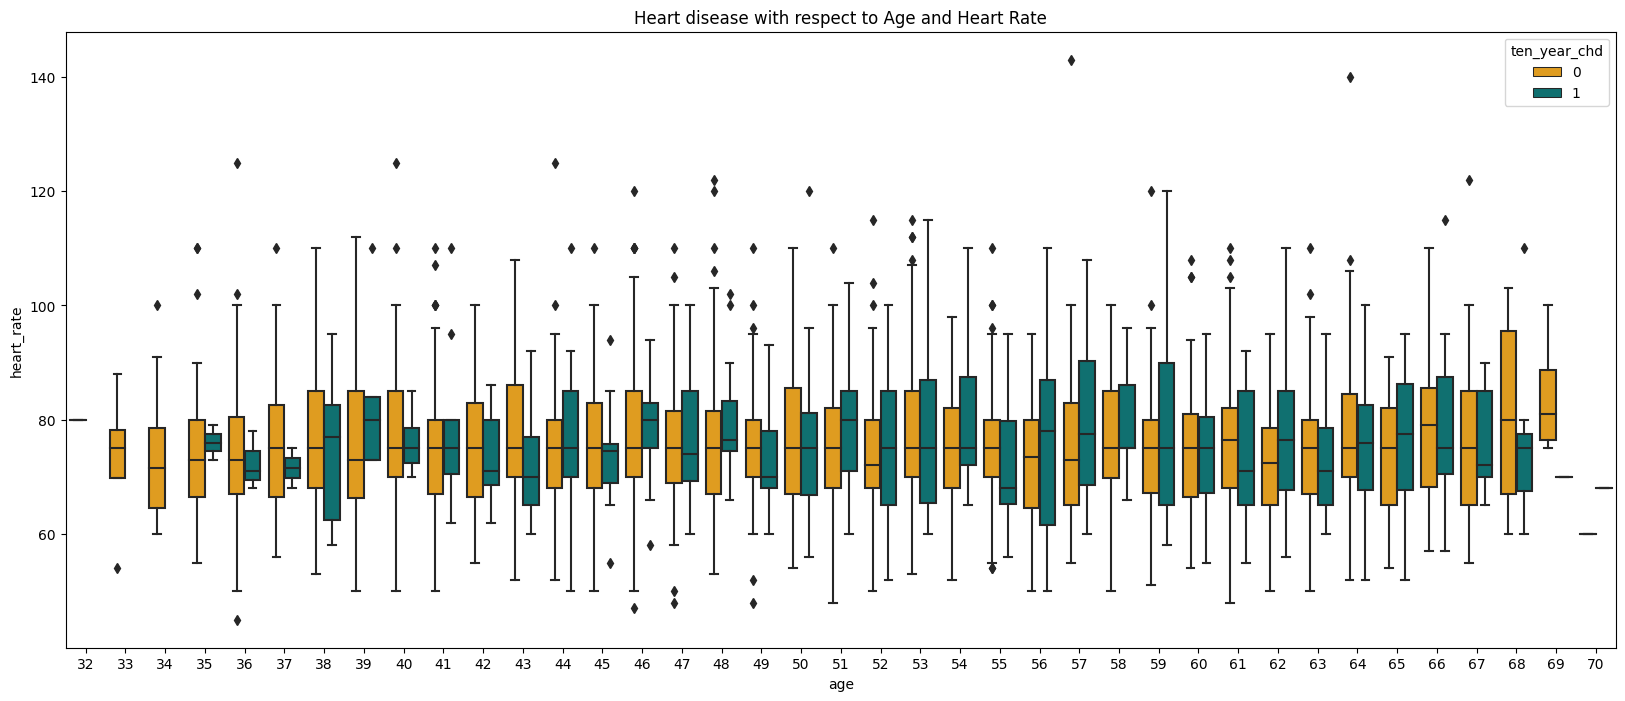

In [54]:
#plotting graph to analyze heart disease incidence with respect to age and heart rate
plt.figure(figsize=(20,8))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.boxplot(x= 'age',y='heart_rate',hue='ten_year_chd',data= cv_risk_df, palette = my_palette)
plt.title('Heart disease with respect to Age and Heart Rate')
plt.show()

##**Handling Multicollinearity**

The following columns exhibit high degree of correlation:

1.   Systolic BP and Diastolic BP: Either one of the columns must be dropped or a feature including both the variables must be added as a column.
2.   is_smoking and cigs_per_day: Is smoking column can be removed since for non-smokers the number of cigs_per_day is mentioned as 0 while for smokers the number of cigs_per_day is mentioned >0, which clearly differentiates non-smokers from smokers.




In [55]:
cv_risk_df = cv_risk_df.drop('is_smoking',axis=1)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

In [56]:
#Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp
cv_risk_df['pulse_pressure'] = (cv_risk_df['systolic_bp']-cv_risk_df['diastolic_bp'])

In [57]:
#Dropping the systolic and diastolic bp columns
cv_risk_df.drop('systolic_bp',axis=1,inplace=True)
cv_risk_df.drop('diastolic_bp',axis=1,inplace=True)
cv_risk_df.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,51.5


In [58]:
#Updating the continuous_var list
continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

Text(0.5, 1.0, 'Distribution of Pulse Pressure')

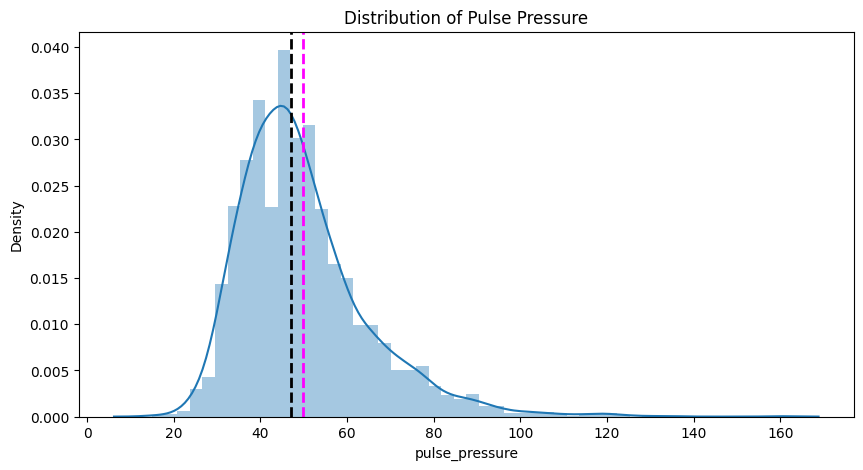

In [59]:
#Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(cv_risk_df['pulse_pressure'])
plt.axvline(cv_risk_df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(cv_risk_df['pulse_pressure'].median(), color='black', linestyle='dashed', linewidth=2)
plt.title('Distribution of Pulse Pressure')

<Figure size 1000x500 with 0 Axes>

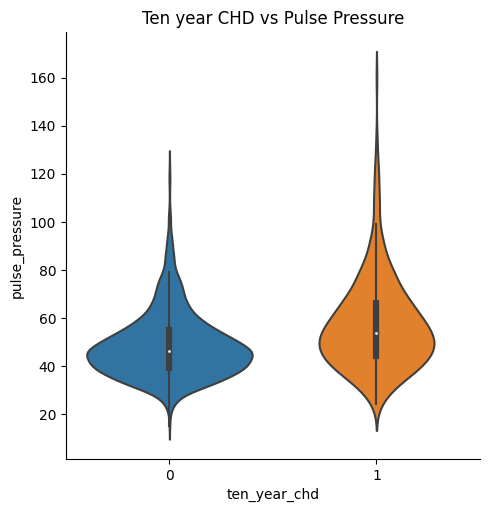

In [60]:
#Relationship between pulse pressure and the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x='ten_year_chd',y='pulse_pressure',data=cv_risk_df,kind='violin')
plt.title('Ten year CHD vs Pulse Pressure')
plt.show()

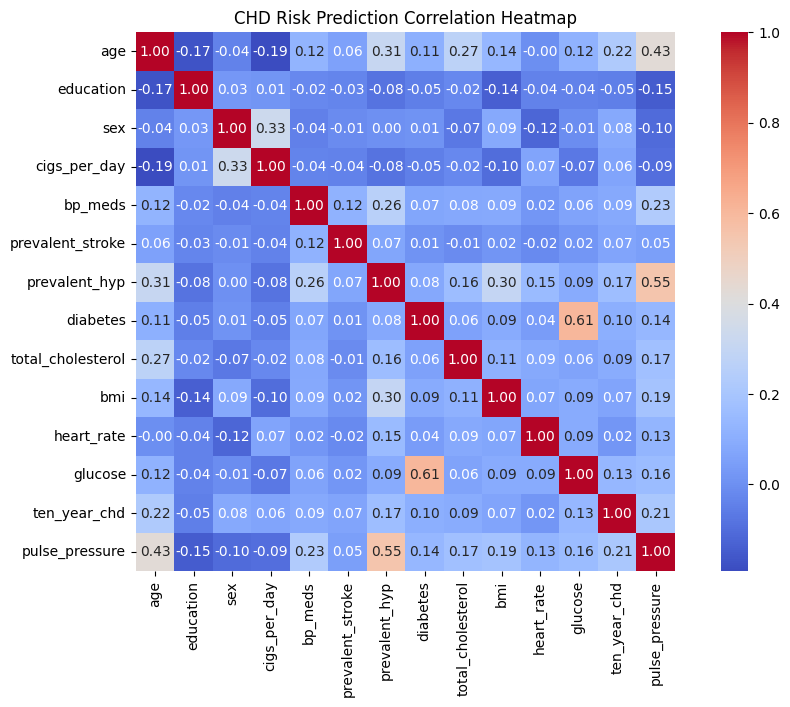

In [61]:
#Correlation matrix after handling the multicollinearity
corrmat = cv_risk_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm', vmax=1, square=True);
plt.title('CHD Risk Prediction Correlation Heatmap')
plt.show()

#**Feature selection**

##**Discrete feature selection**

In [62]:
#chi2 scores
chi_scores = chi2(cv_risk_df[categorical_var],cv_risk_df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959, 25.10243827, 15.8619983 , 64.37770831,
        35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 5.43640748e-07, 6.81331780e-05,
        1.02713702e-15, 2.54226209e-09]))

In [63]:
#P values for discrete features
p_values = pd.Series(chi_scores[1],index = cv_risk_df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}>

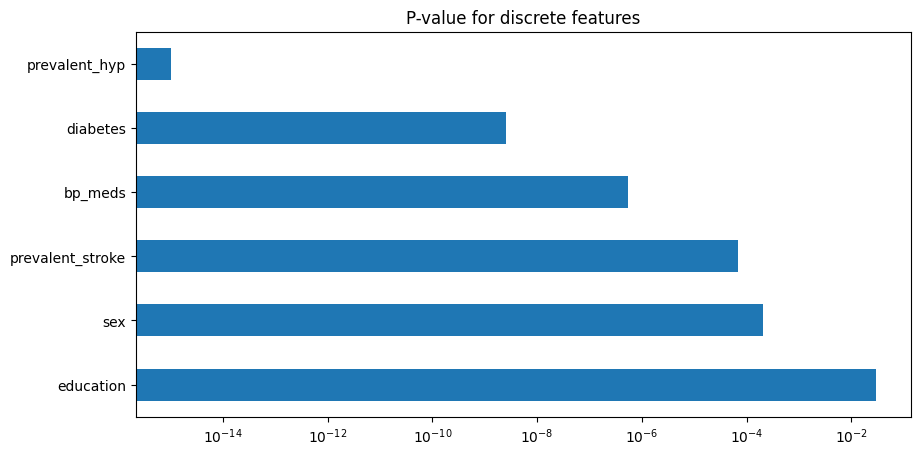

In [64]:
#Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines the outcome of the dependent variable.

##**Outliers**

<Axes: >

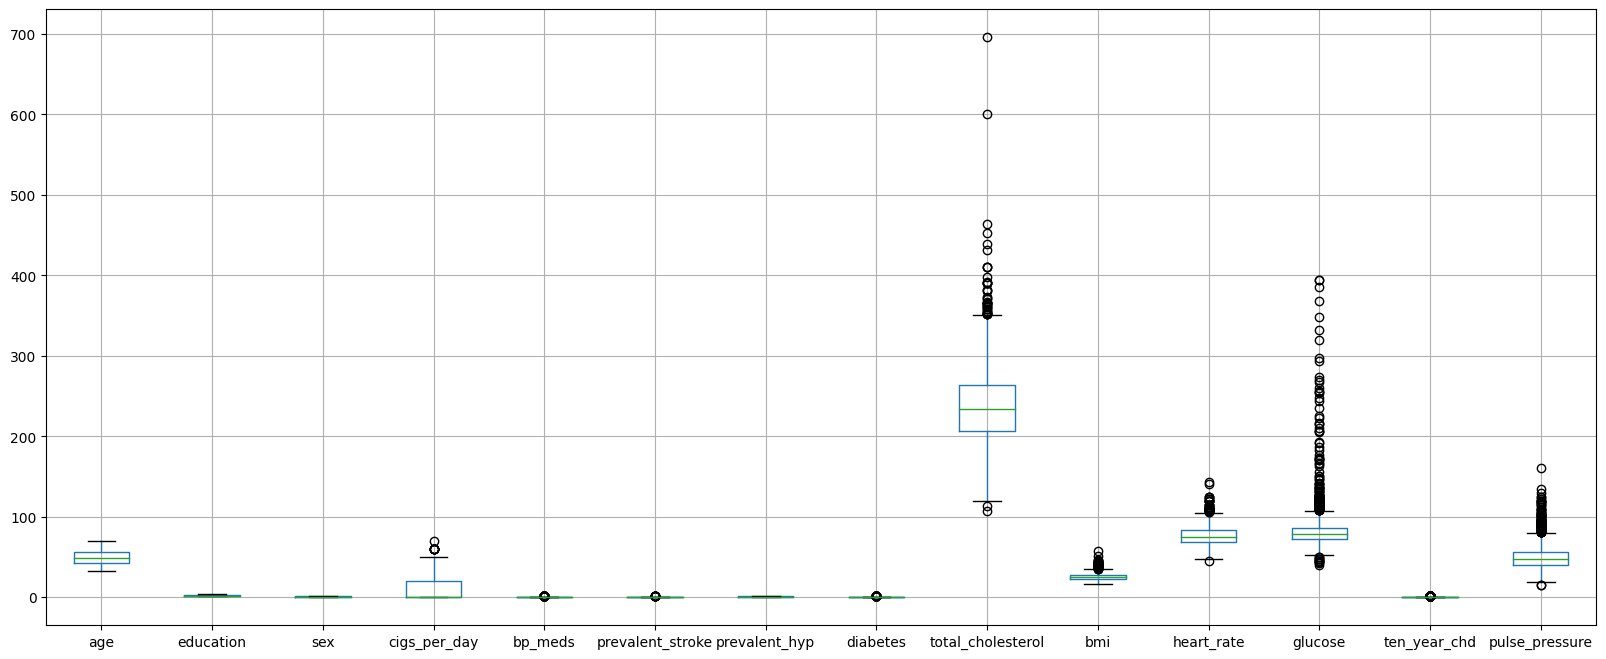

In [65]:
#Checking for outliers for all the variables
plt.figure(figsize=(20,8))
cv_risk_df.boxplot()

There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.

Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.
This is done on the train data only to prevent data leakage.

##**Transforming continuous variables to reduce skew**

In [66]:
#skewness along the index axis
(cv_risk_df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.395888
pulse_pressure       1.412382
dtype: float64

In [67]:
#Skew for log10 transformation
np.log10(cv_risk_df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.325300
pulse_pressure       0.354174
dtype: float64

In [68]:
#Implementing log transformation on continuous variables

cv_risk_df['age']                   = np.log10(cv_risk_df['age']+1)
cv_risk_df['cigs_per_day']          = np.log10(cv_risk_df['cigs_per_day']+1)
cv_risk_df['total_cholesterol']     = np.log10(cv_risk_df['total_cholesterol']+1)
cv_risk_df['bmi']                   = np.log10(cv_risk_df['bmi']+1)
cv_risk_df['heart_rate']            = np.log10(cv_risk_df['heart_rate']+1)
cv_risk_df['glucose']               = np.log10(cv_risk_df['glucose']+1)
cv_risk_df['pulse_pressure']        = np.log10(cv_risk_df['pulse_pressure']+1)

In [69]:
#Checking skew after log transformation
cv_risk_df[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.325300
pulse_pressure       0.354174
dtype: float64

##**Analyzing the distribution of transformed features**

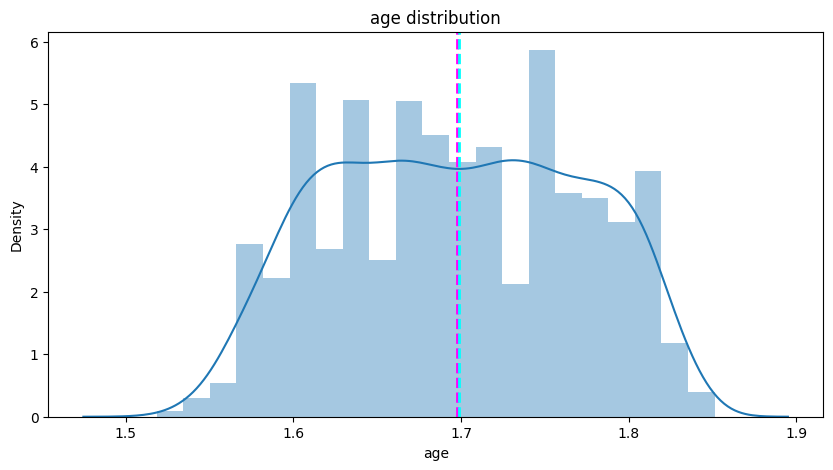

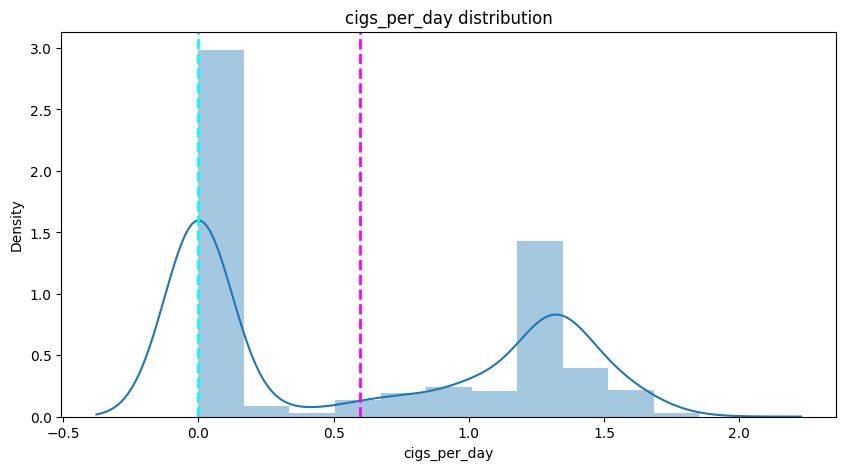

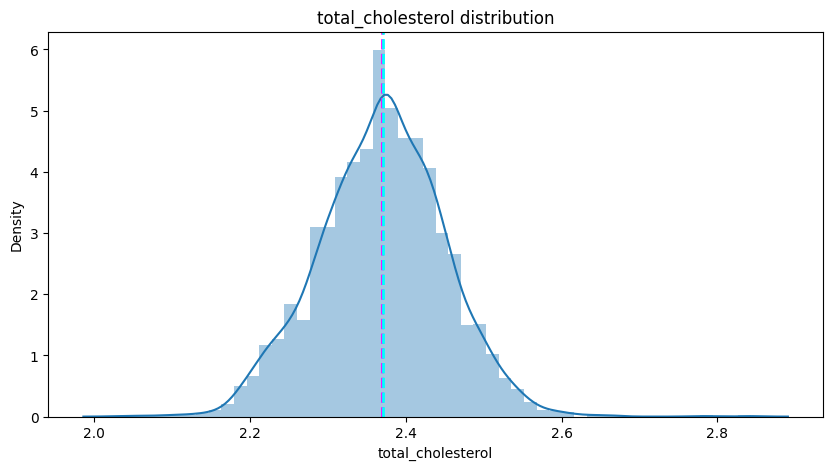

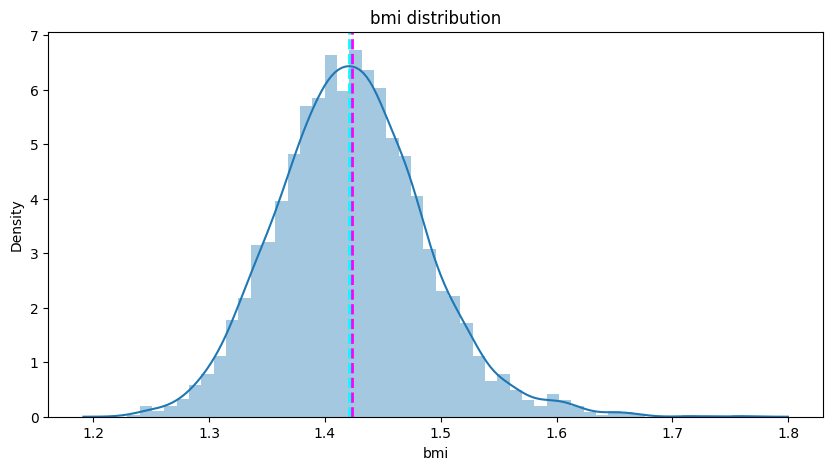

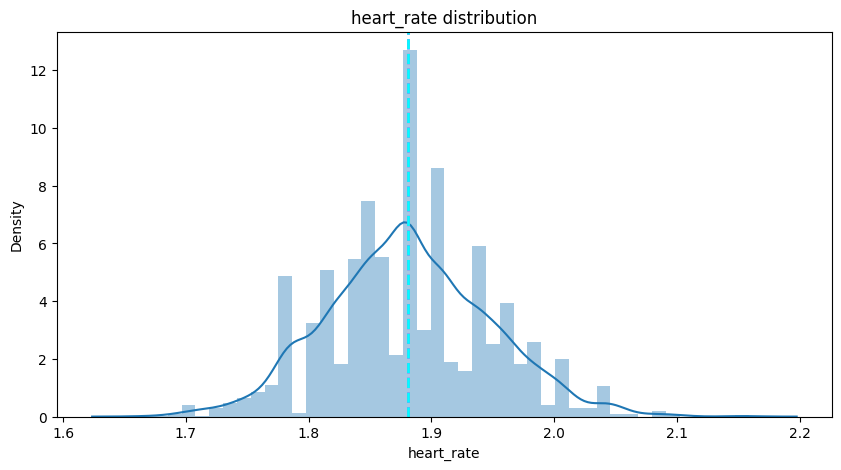

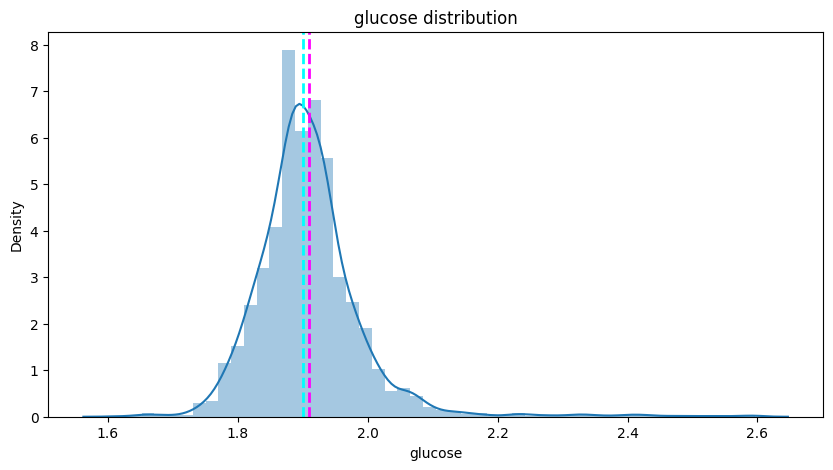

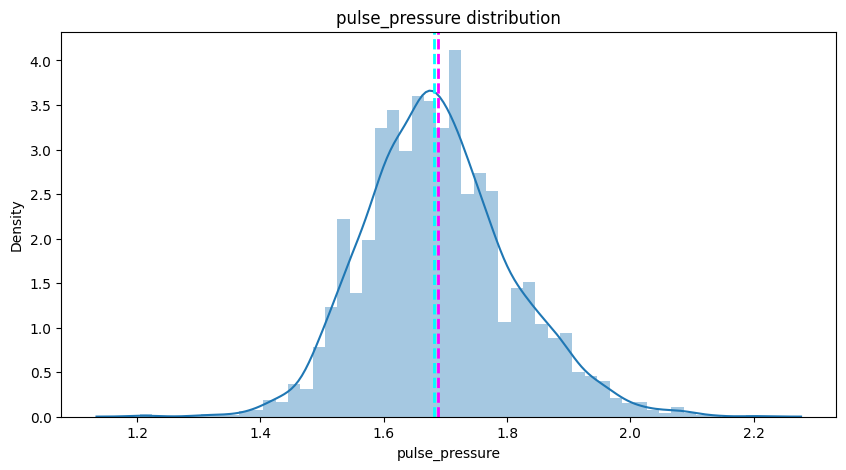

In [70]:
#Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cv_risk_df[col])
  plt.axvline(cv_risk_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(cv_risk_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##**Checking for outliers in transformed features**

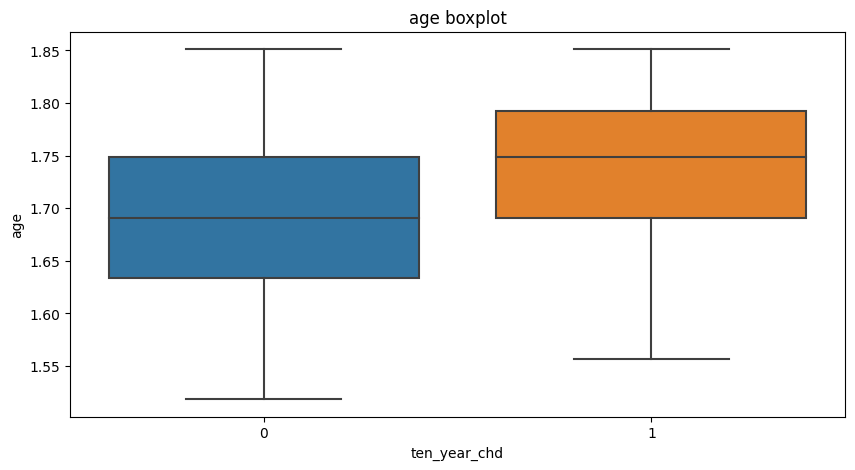

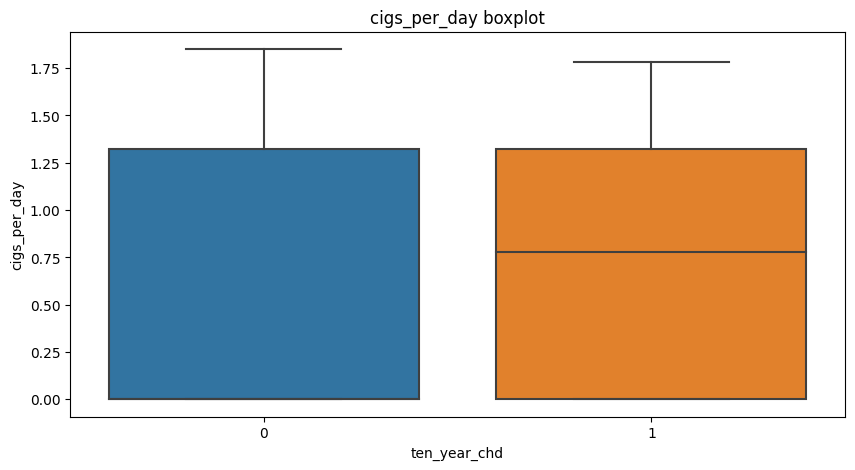

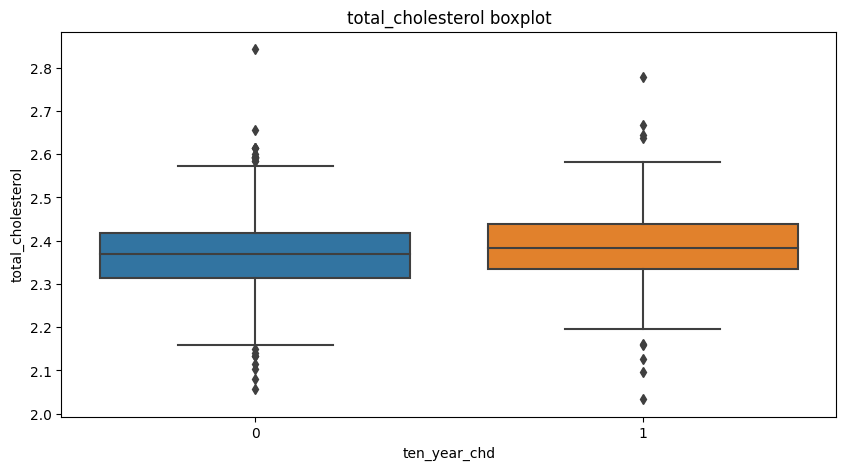

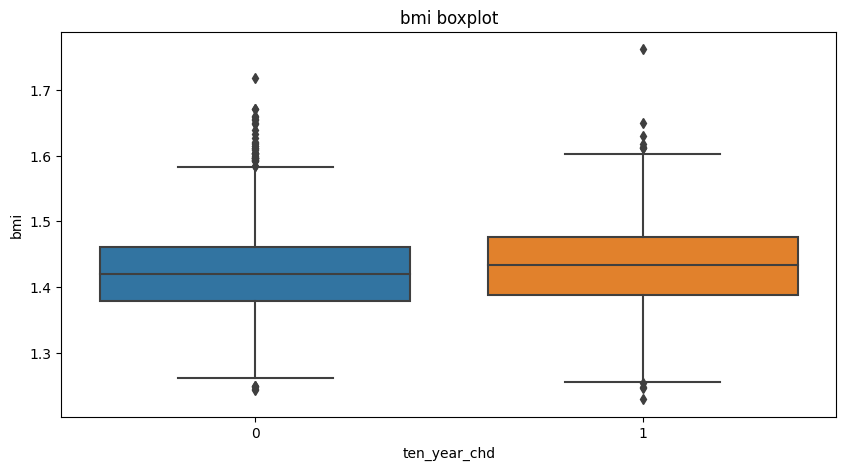

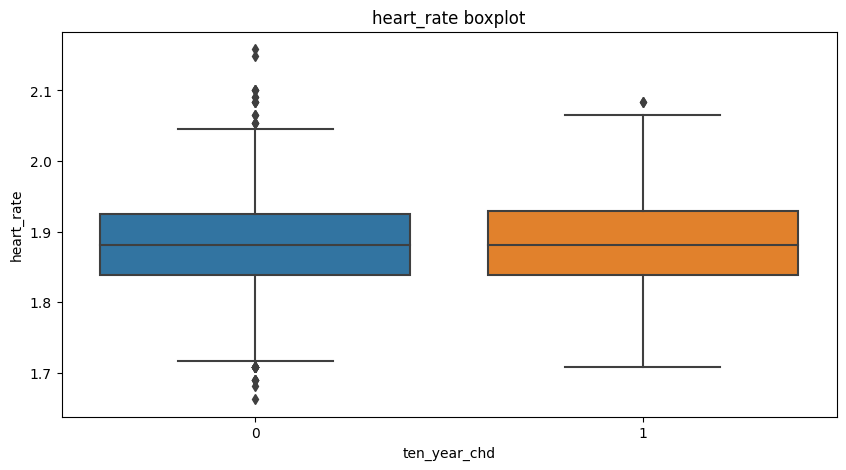

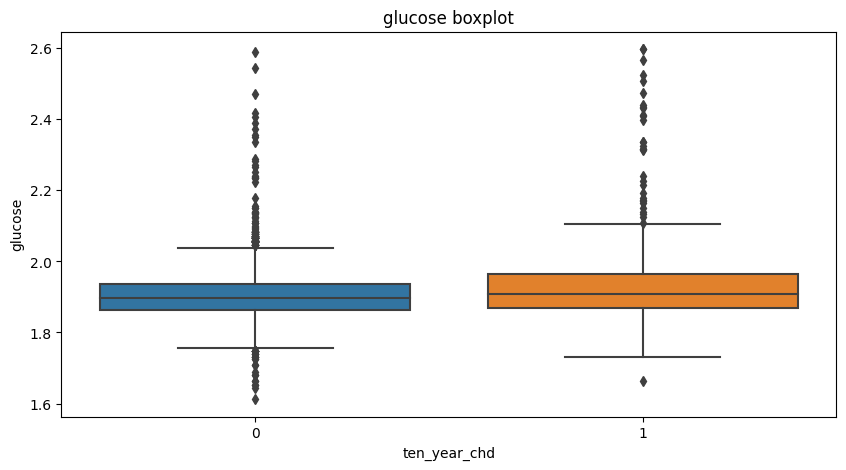

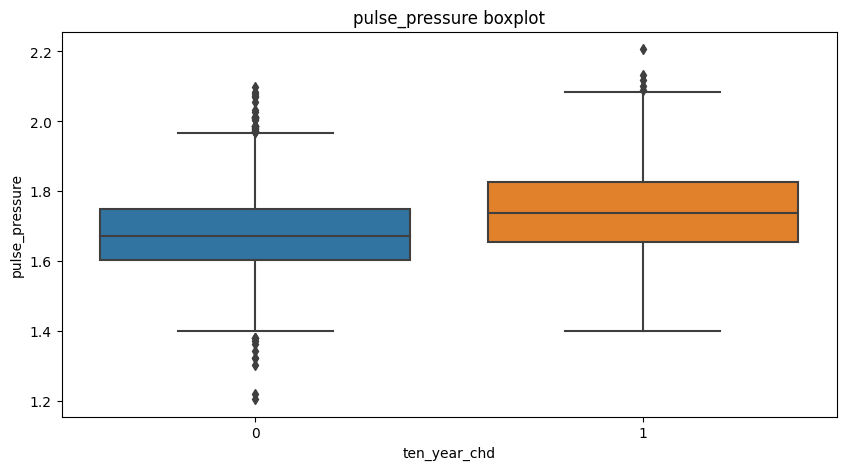

In [71]:
#checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=cv_risk_df)
  plt.title(col+' boxplot')
  plt.show()

Except for age and cigs_per_day columns, rest of the numerical columns contain outliers even after log transformation.

To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.

#**Data preprocessing**

In [72]:
#Defining dependent and independent variables
X = cv_risk_df.drop('ten_year_chd',axis=1)
y = cv_risk_df[dependent_var]

##**Choice of Prediction Model**

##**Evaluation Metrics**

Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.

Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive

In other words, it doesn't matter whether we raise a false alarm but the actual positive cases should not go undetected

Considering these points in mind, it is decided that we use Recall as the model evaluation metric.

In [73]:
#function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

##**Train Test Split**

Since we are working with limited amount of data, ie, around 3390 records, 30% of the records are set aside for testing, 70% for training.

Since the data is imbalanced, stratified split was employed to get almost equal proportion of dependent variables in the train and test sets.

In [74]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [75]:
#Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [76]:
#Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [77]:
#Checking the test distribution of dependent variable
y_test.value_counts()

ten_year_chd
0               864
1               153
dtype: int64

In [78]:
#Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

##**Handling outliers in the train data**

In [79]:
#imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

In [80]:
X_train[continuous_var].skew(axis = 0)

age                 -0.035936
cigs_per_day         0.297586
total_cholesterol   -0.046628
bmi                  0.215412
heart_rate           0.074472
glucose              0.364619
pulse_pressure       0.270388
dtype: float64

##**Oversampling**

<Axes: title={'center': 'Target variable before SMOTE'}, xlabel='ten_year_chd'>

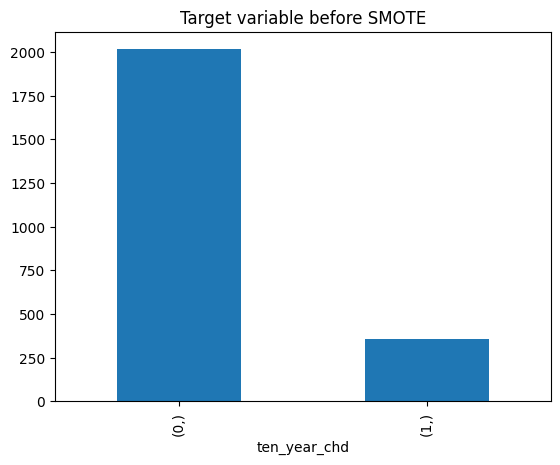

In [81]:
#visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [82]:
#Oversampling using SMOTE
smote = SMOTE()

#fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


<Axes: title={'center': 'Target variable after SMOTE'}, xlabel='ten_year_chd'>

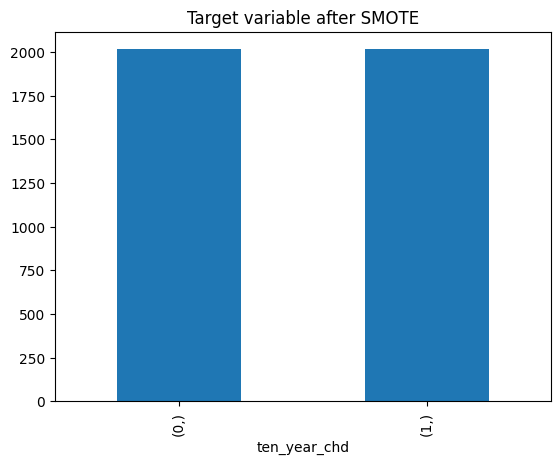

In [83]:
#visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

##**Scaling the data**

In [84]:
#Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

#Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [85]:
#Scaled train values
X_train_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.352753,1.042877,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.279319,-0.546622,-0.267146,-0.526257,0.021221
1,0.238381,-0.929033,1.126340,1.418967,-0.178155,-0.087426,-0.685091,-0.171759,0.165020,0.828332,-0.454995,-1.087348,-0.058061
2,0.872536,-0.929033,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.714396,0.670299,-0.175143,1.537793,-0.392623
3,1.444209,-0.929033,-0.887831,-0.926396,-0.178155,-0.087426,1.459660,-0.171759,2.429594,0.459589,0.841085,1.732021,1.281191
4,0.457551,-0.929033,-0.887831,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.211021,-1.740096,-0.454995,-0.437186,0.021221


In [86]:
#Scaled SMOTE values
X_smote_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.184253,1.117157,1.060909,1.098794,-0.212099,-0.079008,-0.807661,-0.181118,0.217239,-0.647669,-0.320422,-0.593523,-0.160166
1,0.007639,-0.864395,1.060909,1.361670,-0.212099,-0.079008,-0.807661,-0.181118,0.093575,0.803769,-0.518293,-1.181731,-0.241158
2,0.677214,-0.864395,1.060909,1.098794,-0.212099,-0.079008,-0.807661,-0.181118,0.687962,0.636946,-0.223510,1.570278,-0.582934
3,1.280817,-0.864395,-0.942588,-0.956155,-0.212099,-0.079008,1.238143,-0.181118,2.543689,0.414515,0.846937,1.773893,1.126973
4,0.239051,-0.864395,-0.942588,1.098794,-0.212099,-0.079008,-0.807661,-0.181118,0.143346,-1.907532,-0.518293,-0.500148,-0.160166


In [87]:
#scaled test values
X_test_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-1.756334,0.126381,1.060909,1.098794,-0.212099,-0.079008,1.238143,-0.181118,0.409965,0.796380,0.420288,-1.603455,-0.765662
1,-0.744118,2.107933,1.060909,0.253222,-0.212099,-0.079008,1.238143,-0.181118,-0.240363,0.918575,-1.837047,0.451888,0.949742
2,-1.449686,0.126381,-0.942588,-0.956155,-0.212099,-0.079008,-0.807661,-0.181118,-1.466476,-1.398631,-0.518293,-0.051197,-0.365865
3,-0.356726,-0.864395,-0.942588,-0.956155,-0.212099,-0.079008,-0.807661,-0.181118,0.996860,0.461091,-0.320422,-0.227316,0.364338
4,-0.878886,0.126381,-0.942588,1.361670,-0.212099,-0.079008,-0.807661,-0.181118,0.217239,-0.330667,-1.147194,0.035218,-0.451258


#**ML Model Implementation**

##**Logistic Regression**

In [88]:
#Fitting model
lr_model = LogisticRegression()

In [89]:
#Training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [90]:
#Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)
#Training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.688833746898263

In [91]:
#Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)
#Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6666666666666666

In [92]:
#Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       864
           1       0.26      0.67      0.38       153

    accuracy                           0.67      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.82      0.67      0.72      1017



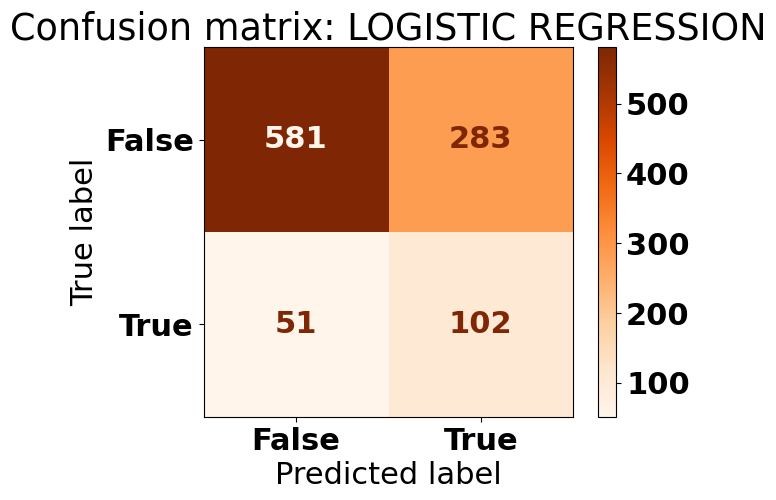

In [93]:
#Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

False negatives obtained after using logistic regression: 53

##**K Nearest Neighbors**

In [94]:
#Value of k taken upto sqrt(n)
#Where n is no of records in the train dataset
#sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

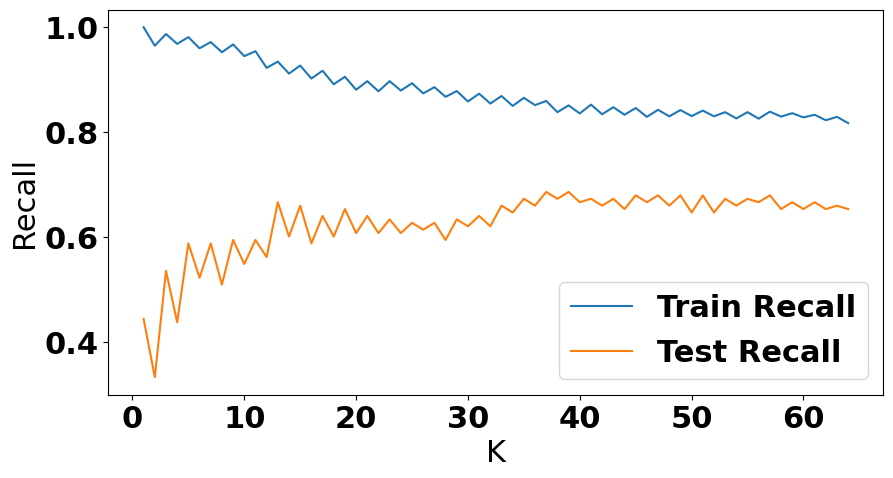

In [95]:
#Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [96]:
#Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

37

In [97]:
#building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [98]:
#training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=37)

In [99]:
#Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [100]:
#training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8595533498759306

In [101]:
#Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [102]:
#Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.6862745098039216

In [103]:
#Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.57      0.70       864
           1       0.22      0.69      0.33       153

    accuracy                           0.59      1017
   macro avg       0.57      0.63      0.52      1017
weighted avg       0.81      0.59      0.65      1017



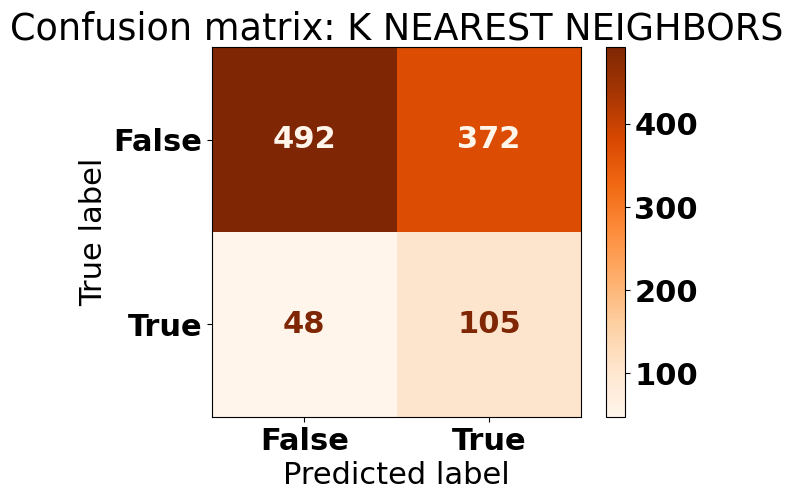

In [104]:
#Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

False negatives obtained after using KNN: 44

##**Naive Bayes**

In [105]:
#Using stratified k fold cross validation so that each split has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3,
                                    random_state=0)

In [106]:
#Fitting model
nb_model = GaussianNB()

In [107]:
#Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [108]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [109]:
#model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [110]:
#building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [111]:
#training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [112]:
#Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)
#training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.5578163771712159

In [113]:
#Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)
#Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5032679738562091

In [114]:
#Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       864
           1       0.28      0.50      0.36       153

    accuracy                           0.73      1017
   macro avg       0.59      0.63      0.59      1017
weighted avg       0.80      0.73      0.76      1017



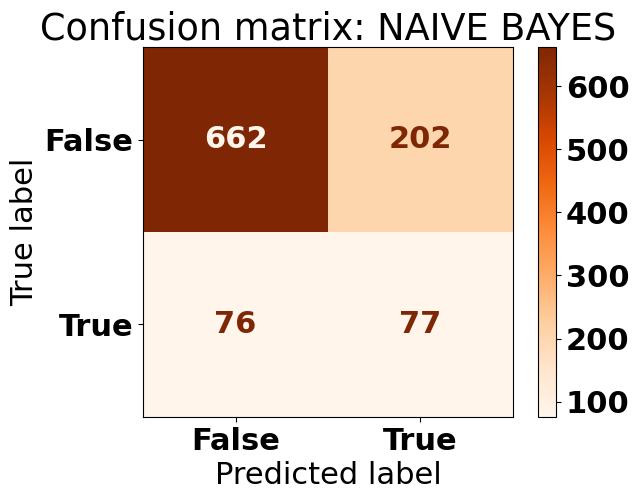

In [116]:
#Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

False negatives obtained after using Naive Bayes: 73

##**Decision tree**

In [117]:
#Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [118]:
#using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [119]:
#model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [120]:
#building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [121]:
#training the model
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [122]:
#Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)
#training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8540942928039702

In [123]:
#Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)
#Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [124]:
#Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

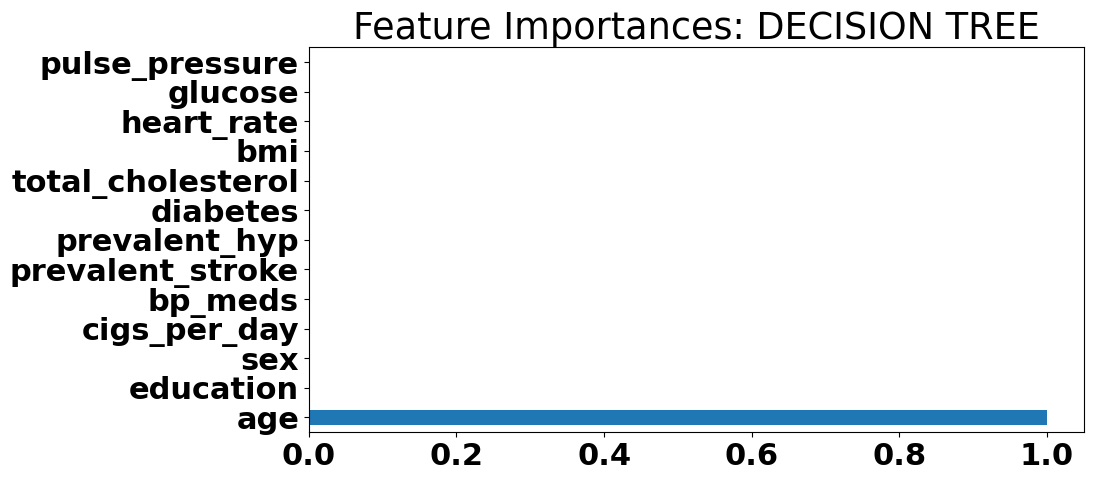

In [125]:
#Feature importances
dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

Only one feature (age) was given imporatance while fitting a decision tree model. This is because of max depth being 1.

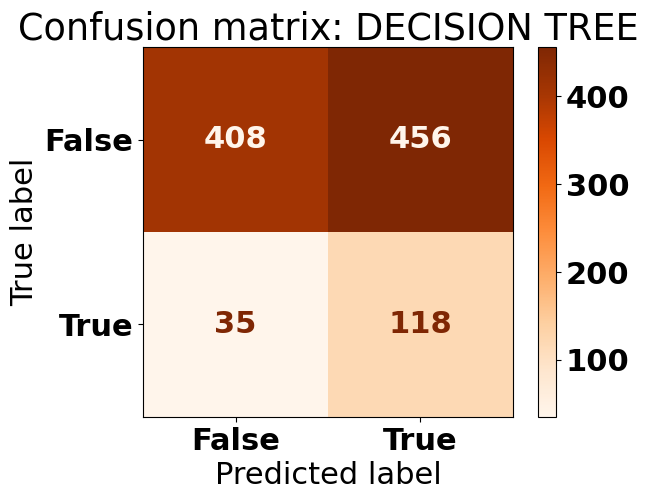

In [126]:
#Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

False negatives obtained after using decision tree: 31

##**Support Vector Machines**

In [127]:
#SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [128]:
#Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [129]:
#model best parameters
svm_best_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [130]:
#building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [131]:
#training the model
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=10, gamma=0.01)

In [132]:
#Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)
#training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.75136476426799

In [133]:
#Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)
#Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.5751633986928104

In [134]:
#Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       864
           1       0.24      0.58      0.34       153

    accuracy                           0.67      1017
   macro avg       0.57      0.63      0.56      1017
weighted avg       0.80      0.67      0.71      1017



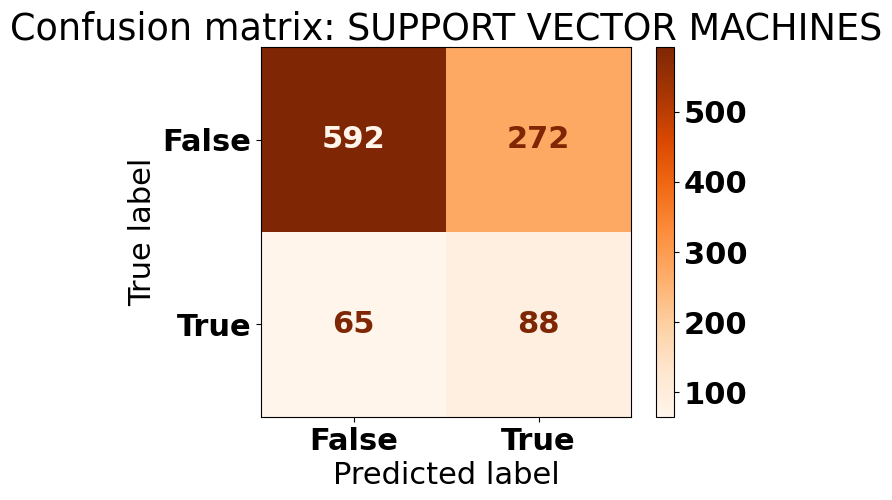

In [135]:
#Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

False negatives obtained after using Support Vector Machines: 51

##**Random forests**

In [136]:
#random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    #limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
#using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
#best parameters for random forests
rf_best_params

In [ ]:
#Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

In [ ]:
#fit
rf_model.fit(X_smote,y_smote)

In [ ]:
#train predictions
rf_train_pred = rf_model.predict(X_smote)
#train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

In [ ]:
#Test predictions
rf_test_pred = rf_model.predict(X_test)
#test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

In [ ]:
#Classification report
print(classification_report(y_test,rf_test_pred))

In [ ]:
#Feature importances
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

Features other than age are also given importance in this case insted of just one feature in case of decision tree.

But age still remains the most important feature in predicting the final outcome for random forests.

In [ ]:
#Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

False negatives obtained after using Random forests: 54

##**XG Boost**

In [ ]:
#XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    #limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
#using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
#best parameters for xgboost classifier
xgb_best_params

In [ ]:
#Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
#fit
xgb_model.fit(X_smote_scaled,y_smote)

In [ ]:
#train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
#train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

In [ ]:
#Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
#test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

In [ ]:
#Classification report
print(classification_report(y_test,xgb_test_pred))

In [ ]:
#Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

Age in the most important feature in deciding the outcome of the variables for XG boost.

Multiple features are given importance here rather than just one feature in case of decision tree.

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

In [ ]:
#Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

#**Results and Conclusion**

In [ ]:
#Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','Random Forests',rf_train_recall*100,rf_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

In [ ]:
#Plotting Recall scores
ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')

plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()